In [ ]:
# !pip install flask_ngrok
# !pip install pyngrok
!ngrok authtoken  28scevjTjejJs6Rcu0BdAY4UKZp_4Uk4RMgnKedSMtHRS59qU
# !pip install statistics
!pip install pyhrv
!pip install flask-ngrok
# !pip install numpy
# !pip install firebase
# !pip install pyrebase
#!firebase_admin


/bin/bash: ngrok: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import random as rk
import json
import re
import statistics as stat
import pyhrv
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import numpy as np
from numpy import sqrt
import pickle
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from datetime import datetime
from datetime import timedelta
import firebase_admin
from firebase_admin import db
from firebase_admin import credentials
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
from flask import Flask,request,jsonify
from flask_ngrok import run_with_ngrok


In [ ]:
# data = pd.read_csv('p1.txt', sep=" ")


# time = data['s']
# rri = data['rri']
# sum(rri)


# Firebase connection 

In [ ]:
  # Fetch the service account key JSON file
cred = credentials.Certificate('firebase-sdk.json')
print("cred########################")

# Initialize the app with a service account
firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://stress-prediction-5a55a-default-rtdb.firebaseio.com/'
})
print("init#####################################")

cred########################
init#####################################


In [ ]:
def push(prediction):

  print("made it in#######################")


  current_time = datetime.now()

  n = 2
  # Add 2 hours to datetime object containing current time
  future_time = current_time + timedelta(hours=n)

  # Convert datetime object to string in specific format 
  date = future_time.strftime('%Y-%m-%d')
  time = future_time.strftime('%H:%M:%S')
  # date
  # prediction = 1

  data ={date:{'time': time, "prediction": prediction}}


  ref = db.reference('/')
  date_ref = ref.child('date').child(date)

  date_ref.push({
          'time': time,
          'prediction': prediction
  })
  print("pushed###########################################################")

  return 1


# New Section

function to process the rr intervals

In [ ]:
def ProcessRR(rr):
  mean = stat.mean(rr)                        #1
  median = stat.median(rr)                    #2
  sdrr = stat.stdev(rr)

  temp = 0
  for i in range(len(rr)- 1):
    temp += (rr[i+1] - rr[i])**2

  rmssd = sqrt(temp/(len(rr)-1))


  sdrr_rmssd = sdrr/rmssd                     #3

  #relative rr intervals 
  rel_rr = list()

  for i in range(1,len(rr)-1):
    rr_i = (2*(rr[i] - rr[i-1]))/(rr[i] + rr[i-1])    
    rel_rr.append(rr_i)

  median_rel_rr = stat.median(rel_rr)         #4
  sd_rel = stat.stdev(rel_rr)

  # print("rmssd: "+ str(rmssd))
  # print("sdrr: "+ str(sdrr))
  # print("median_rel" + str(median_rel_rr))
  # print("##############################")

  temp = 0
  for j in range(len(rr)-1):
    i = j+1
    temp += (rr[i] - rr[i-1])**2

  rmssd_rel = sqrt(temp/(len(rr)-1))

  sdrr_rmssd_rel = (sd_rel/rmssd_rel)*100             #5

  fdomain = fd.welch_psd(rr,show=False,show_param=False, legend=False)

  vlf = fdomain['fft_abs'][0]                 #6
  vlf_pct = fdomain['fft_rel'][0]             #7

  processed = {'mean':mean,'median': median,'sdrr_rmssd':sdrr_rmssd,'median_rel_rr': median_rel_rr,'sdrr_rmssd_rel': sdrr_rmssd_rel,'vlf': vlf,'vlf_pct': vlf_pct }

  return processed



testing proccess function

In [ ]:

# rri = np.array(rri).reshape(1,len(rri))
# # count = 0


# # #isolate 5 mins of data
# # for i in rri:i.append(7)
# i

# #   count += i
# #   counter += 1
# #   if count >= 300000:
# #     rr = rri[:counter]
# #     break

# # data = ProcessRR(rr)
# # data
# rri
# i = []
# i.append(7)
# i



load model

In [ ]:
# filename = 'randomForest.sav'
filename = 'knn.sav'

model = pickle.load(open(filename, 'rb'))

Test model

In [ ]:
# count = 0 
# start = 0
# sessions = 0
# counter = 0

# predictions = []
# #'median_rel_rr': median_rel_rr,'sdrr_rmssd_rel': sdrr_rmssd_rel,'vlf': vlf,'vlf_pct': vlf_pct
# #processed = [['MEAN_RR','MEDIAN_RR','SDRR_RMSSD','MEDIAN_REL_RR','SDRR_RMSSD_REL_RR','VLF','VLF_PCT']]
# processed = []

# rri = np.array(rri)
# time = np.array(time)

# #isolate 5 mins of data
# for i in time:

#   if i - time[start] >= 300:
#     rr = rri[start:counter]
#     process = list(ProcessRR(rr).values())    
#     processed.append(process)

#     start = counter + 1
#     sessions += 1


#   counter += 1 

# sessions
# print(f"processed: {processed}")
# df = pd.DataFrame(processed, columns = ['MEAN_RR','MEDIAN_RR','SDRR_RMSSD','MEDIAN_REL_RR','SDRR_RMSSD_REL_RR','VLF','VLF_PCT'])

# prediction = model.predict(df)     
     


# print("predictions: ")
# prediction

run app


In [ ]:
app = Flask(__name__) #the name of the application package
run_with_ngrok(app) 
t = 0
samples = []
processed = []
sample_len = 220

home page 

In [ ]:
# @app.route("/") #code to assign HomePage URL in our app to function home.

# def home():
#   imhere(t)
#   '''
#   The entire line below must be written in a single line.
#   '''
#   return "<marquee><h3> TO CHECK IN PUT ADD '/input' TO THE URL AND TO CHECK OUT PUT ADD '/output' TO THE URL.</h3></marquee>"
  

API

In [ ]:
@app.route('/rrs', methods=['GET','POST']) #output page

def decode():
    if(request.method == 'POST'):
        request_data = request.data
        request_data = json.loads(request_data.decode('utf-8'))
        sample = request_data['rrs']
        print(sample)

        nums = re.findall(r'\d{1,4}', sample)
        print(nums)

        for i in nums:
          samples.append(int(i))
        
          print(f"sample length: {len(samples)}")

          if len(samples) > sample_len:
            rr = np.array(samples)
            samples.clear()
            process = list(ProcessRR(rr).values())    
            processed.append(process)

            df = pd.DataFrame(processed, columns = ['MEAN_RR','MEDIAN_RR','SDRR_RMSSD','MEDIAN_REL_RR','SDRR_RMSSD_REL_RR','VLF','VLF_PCT'])

            pred_list= model.predict(df) 
            print('predlist###############')
            print(pred_list)
            predict = int(pred_list[0])
            print(f'{predict} ######################################################')
            if predict == 0:
              prediction = 2
            elif predict == 1: 
              prediction = 0;
            else:
              prediction = 1;

            print(f"############################################ prediction: {prediction}")
            processed.clear()


            push(prediction)
            print("pushed#####################################")

            
            
            return "d"


    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9a8d-35-243-206-254.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:41] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[406]
['406']
sample length: 1
[1002]
['1002']
sample length: 2


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:42] "POST /rrs HTTP/1.1" 500 -


[550]
['550']
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:43] "POST /rrs HTTP/1.1" 500 -


[665, 666]
['665', '666']
sample length: 4
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:45] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[616]
['616']
sample length: 6
[654, 631]
['654', '631']
sample length: 7
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:47] "POST /rrs HTTP/1.1" 500 -


[582]
['582']
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:48] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[618, 591, 574]
['618', '591', '574']
sample length: 10
sample length: 11
sample length: 12
[298]
['298']
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:49] "POST /rrs HTTP/1.1" 500 -


[878]
['878']
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:50] "POST /rrs HTTP/1.1" 500 -


[912]
['912']
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:51] "POST /rrs HTTP/1.1" 500 -


[652, 932]
['652', '932']
sample length: 16
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:52] "POST /rrs HTTP/1.1" 500 -


[913]
['913']
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:54] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[]
[]
[358, 1046]
['358', '1046']
sample length: 19
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:55] "POST /rrs HTTP/1.1" 500 -


[846, 768, 1122]
['846', '768', '1122']
sample length: 21
sample length: 22
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:56] "POST /rrs HTTP/1.1" 500 -


[398]
['398']
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:57] "POST /rrs HTTP/1.1" 500 -


[683]
['683']
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:58] "POST /rrs HTTP/1.1" 500 -


[732]
['732']
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:00:59] "POST /rrs HTTP/1.1" 500 -


[780]
['780']
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:00] "POST /rrs HTTP/1.1" 500 -


[819, 866]
['819', '866']
sample length: 28
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:01] "POST /rrs HTTP/1.1" 500 -


[854, 770]
['854', '770']
sample length: 30
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:02] "POST /rrs HTTP/1.1" 500 -


[716, 288]
['716', '288']
sample length: 32
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:03] "POST /rrs HTTP/1.1" 500 -


[432]
['432']
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:04] "POST /rrs HTTP/1.1" 500 -


[728]
['728']
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:05] "POST /rrs HTTP/1.1" 500 -


[745, 583, 876]
['745', '583', '876']
sample length: 36
sample length: 37
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:06] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:07] "POST /rrs HTTP/1.1" 500 -


[681, 698]
['681', '698']
sample length: 39
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:08] "POST /rrs HTTP/1.1" 500 -


[727, 750]
['727', '750']
sample length: 41
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:09] "POST /rrs HTTP/1.1" 500 -


[770]
['770']
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:10] "POST /rrs HTTP/1.1" 500 -


[765, 744]
['765', '744']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:11] "POST /rrs HTTP/1.1" 500 -


[411, 313]
['411', '313']
sample length: 46
sample length: 47


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:12] "POST /rrs HTTP/1.1" 500 -


[713, 261, 463]
['713', '261', '463']
sample length: 48
sample length: 49
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:13] "POST /rrs HTTP/1.1" 500 -


[593]
['593']
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:14] "POST /rrs HTTP/1.1" 500 -


[757]
['757']
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:15] "POST /rrs HTTP/1.1" 500 -


[631, 748]
['631', '748']
sample length: 53
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:16] "POST /rrs HTTP/1.1" 500 -


[494]
['494']
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:17] "POST /rrs HTTP/1.1" 500 -


[632, 693]
['632', '693']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:18] "POST /rrs HTTP/1.1" 500 -


[466]
['466']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:19] "POST /rrs HTTP/1.1" 500 -


[267]
['267']
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:20] "POST /rrs HTTP/1.1" 500 -


[1542]
['1542']
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:21] "POST /rrs HTTP/1.1" 500 -


[722, 715]
['722', '715']
sample length: 61
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:22] "POST /rrs HTTP/1.1" 500 -


[698, 669]
['698', '669']
sample length: 63
sample length: 64


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:23] "POST /rrs HTTP/1.1" 500 -


[634]
['634']
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:24] "POST /rrs HTTP/1.1" 500 -


[1316]
['1316']
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:25] "POST /rrs HTTP/1.1" 500 -


[682]
['682']
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:26] "POST /rrs HTTP/1.1" 500 -


[722]
['722']
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:27] "POST /rrs HTTP/1.1" 500 -


[747, 717]
['747', '717']
sample length: 69
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:28] "POST /rrs HTTP/1.1" 500 -


[713, 667, 639]
['713', '667', '639']
sample length: 71
sample length: 72
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:29] "POST /rrs HTTP/1.1" 500 -


[388]
['388']
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:30] "POST /rrs HTTP/1.1" 500 -


[394, 425, 561]
['394', '425', '561']
sample length: 75
sample length: 76
sample length: 77


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:01:31] "POST /rrs HTTP/1.1" 500 -


[575, 562]
['575', '562']
sample length: 78
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:19] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[716]
['716']
sample length: 80
[682, 715]
['682', '715']
sample length: 81
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:20] "POST /rrs HTTP/1.1" 500 -


[709]
['709']
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:20] "POST /rrs HTTP/1.1" 500 -


[695, 720]
['695', '720']
sample length: 84
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:21] "POST /rrs HTTP/1.1" 500 -


[708, 693]
['708', '693']
sample length: 86
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:22] "POST /rrs HTTP/1.1" 500 -


[662, 642]
['662', '642']
sample length: 88
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:23] "POST /rrs HTTP/1.1" 500 -


[623]
['623']
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:24] "POST /rrs HTTP/1.1" 500 -


[622]
['622']
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:24] "POST /rrs HTTP/1.1" 500 -


[651, 747]
['651', '747']
sample length: 92
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:26] "POST /rrs HTTP/1.1" 500 -


[815]
['815']
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:27] "POST /rrs HTTP/1.1" 500 -


[826]
['826']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:28] "POST /rrs HTTP/1.1" 500 -


[855, 768]
['855', '768']
sample length: 96
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:29] "POST /rrs HTTP/1.1" 500 -


[696]
['696']
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:30] "POST /rrs HTTP/1.1" 500 -


[685, 680]
['685', '680']
sample length: 99
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:31] "POST /rrs HTTP/1.1" 500 -


[717]
['717']
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[606, 588][762, 720]
['606', '588']
sample length: 102
sample length: 103

['762', '720']
sample length: 104
sample length: 105
[705, 659]
[794]
['794']
['705', '659'][627]
sample length: 106sample length: 107


[773]
['773']sample length: 108
['627']
sample length: 109

sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:49] "POST /rrs HTTP/1.1" 500 -


[574, 551]
['574', '551']
sample length: 111
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:50] "POST /rrs HTTP/1.1" 500 -


[541, 534]
['541', '534']
sample length: 113
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:52] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[610]
['610']
sample length: 115
[533, 563]
['533', '563']
sample length: 116
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:52] "POST /rrs HTTP/1.1" 500 -


[597]
['597']
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:54] "POST /rrs HTTP/1.1" 500 -


[673, 791]
['673', '791']
sample length: 119
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:55] "POST /rrs HTTP/1.1" 500 -


[845]
['845']
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:56] "POST /rrs HTTP/1.1" 500 -


[762]
['762']
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:57] "POST /rrs HTTP/1.1" 500 -


[695, 675]
['695', '675']
sample length: 123
sample length: 124


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:02:58] "POST /rrs HTTP/1.1" 500 -


[744, 731]
['744', '731']
sample length: 125
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:00] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[621, 621]
['621', '621']
sample length: 127
sample length: 128
[663]
['663']
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:01] "POST /rrs HTTP/1.1" 500 -


[634]
['634']
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:02] "POST /rrs HTTP/1.1" 500 -


[695]
['695']
sample length: 131


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:02] "POST /rrs HTTP/1.1" 500 -


[740, 761]
['740', '761']
sample length: 132
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:04] "POST /rrs HTTP/1.1" 500 -


[743]
['743']
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:05] "POST /rrs HTTP/1.1" 500 -


[773]
['773']
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:06] "POST /rrs HTTP/1.1" 500 -


[770, 772]
['770', '772']
sample length: 136
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:07] "POST /rrs HTTP/1.1" 500 -


[761]
['761']
sample length: 138


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:08] "POST /rrs HTTP/1.1" 500 -


[744, 715]
['744', '715']
sample length: 139
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:09] "POST /rrs HTTP/1.1" 500 -


[681]
['681']
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:10] "POST /rrs HTTP/1.1" 500 -


[669, 664]
['669', '664']
sample length: 142
sample length: 143


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:11] "POST /rrs HTTP/1.1" 500 -


[744]
['744']
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:12] "POST /rrs HTTP/1.1" 500 -


[786]
['786']
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:13] "POST /rrs HTTP/1.1" 500 -


[807, 732]
['807', '732']
sample length: 146
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:14] "POST /rrs HTTP/1.1" 500 -


[720]
['720']
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:15] "POST /rrs HTTP/1.1" 500 -


[760]
['760']
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:16] "POST /rrs HTTP/1.1" 500 -


[758, 790]
['758', '790']
sample length: 150
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:47] "POST /rrs HTTP/1.1" 500 -


[858]
['858']
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:48] "POST /rrs HTTP/1.1" 500 -


[861, 753]
['861', '753']
sample length: 153
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:50] "POST /rrs HTTP/1.1" 500 -


[752, 706]
['752', '706']
sample length: 155
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:50] "POST /rrs HTTP/1.1" 500 -


[773]
['773']
sample length: 157


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:51] "POST /rrs HTTP/1.1" 500 -


[667]
['667']
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:52] "POST /rrs HTTP/1.1" 500 -


[635, 620]
['635', '620']
sample length: 159
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:53] "POST /rrs HTTP/1.1" 500 -


[606, 619]
['606', '619']
sample length: 161
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:54] "POST /rrs HTTP/1.1" 500 -


[642]
['642']
sample length: 163


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:55] "POST /rrs HTTP/1.1" 500 -


[661, 662]
['661', '662']
sample length: 164
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:56] "POST /rrs HTTP/1.1" 500 -


[648]
['648']
sample length: 166


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:57] "POST /rrs HTTP/1.1" 500 -


[699]
['699']
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:03:59] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[690, 760]
['690', '760']
sample length: 168
sample length: 169
[708]
['708']
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:00] "POST /rrs HTTP/1.1" 500 -


[726, 695]
['726', '695']
sample length: 171
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:01] "POST /rrs HTTP/1.1" 500 -


[704]
['704']
sample length: 173


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:32] "POST /rrs HTTP/1.1" 500 -


[707, 699]
['707', '699']
sample length: 174
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:33] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 176


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:34] "POST /rrs HTTP/1.1" 500 -


[686, 677]
['686', '677']
sample length: 177
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:36] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[670, 644]
['670', '644']
sample length: 179
sample length: 180
[653]
['653']
sample length: 181


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:37] "POST /rrs HTTP/1.1" 500 -


[668]
['668']
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:39] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[692]
['692']
sample length: 183
[705, 698]
['705', '698']
sample length: 184
sample length: 185


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:40] "POST /rrs HTTP/1.1" 500 -


[739, 748]
['739', '748']
sample length: 186
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:41] "POST /rrs HTTP/1.1" 500 -


[716]
['716']
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:42] "POST /rrs HTTP/1.1" 500 -


[679, 646]
['679', '646']
sample length: 189
sample length: 190
[631]
['631']
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:43] "POST /rrs HTTP/1.1" 200 -


pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:44] "POST /rrs HTTP/1.1" 500 -


[659, 685]
['659', '685']
sample length: 1
sample length: 2


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:45] "POST /rrs HTTP/1.1" 500 -


[724]
['724']
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:46] "POST /rrs HTTP/1.1" 500 -


[739]
['739']
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:48] "POST /rrs HTTP/1.1" 500 -


[740, 770]
['740', '770']
sample length: 5
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:49] "POST /rrs HTTP/1.1" 500 -


[752]
['752']
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:49] "POST /rrs HTTP/1.1" 500 -


[741, 688]
['741', '688']
sample length: 8
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:50] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:52] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[683]
['683']
sample length: 11
[715, 712]
['715', '712']
sample length: 12
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:54] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[699, 685]
['699', '685']
sample length: 14
sample length: 15
[746]
['746']
sample length: 16


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:55] "POST /rrs HTTP/1.1" 500 -


[716]
['716']
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:56] "POST /rrs HTTP/1.1" 500 -


[705, 699]
['705', '699']
sample length: 18
sample length: 19


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:57] "POST /rrs HTTP/1.1" 500 -


[720]
['720']
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:04:59] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[687, 691]
['687', '691']
sample length: 21
sample length: 22
[700]
['700']
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:00] "POST /rrs HTTP/1.1" 500 -


[695, 660]
['695', '660']
sample length: 24
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:01] "POST /rrs HTTP/1.1" 500 -


[678]
['678']
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:02] "POST /rrs HTTP/1.1" 500 -


[683, 710]
['683', '710']
sample length: 27
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:04] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[669]
['669']
sample length: 29
[669, 665]
['669', '665']
sample length: 30
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:05] "POST /rrs HTTP/1.1" 500 -


[667, 650]
['667', '650']
sample length: 32
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:06] "POST /rrs HTTP/1.1" 500 -


[681]
['681']
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:07] "POST /rrs HTTP/1.1" 500 -


[680]
['680']
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:08] "POST /rrs HTTP/1.1" 500 -


[705, 666]
['705', '666']
sample length: 36
sample length: 37


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:09] "POST /rrs HTTP/1.1" 500 -


[714]
['714']
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:10] "POST /rrs HTTP/1.1" 500 -


[698, 694]
['698', '694']
sample length: 39
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:11] "POST /rrs HTTP/1.1" 500 -


[672, 677]
['672', '677']
sample length: 41
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:12] "POST /rrs HTTP/1.1" 500 -


[666]
['666']
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:13] "POST /rrs HTTP/1.1" 500 -


[638, 659]
['638', '659']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:14] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:15] "POST /rrs HTTP/1.1" 500 -


[656, 651]
['656', '651']
sample length: 47
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:16] "POST /rrs HTTP/1.1" 500 -


[679]
['679']
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:32] "POST /rrs HTTP/1.1" 500 -


[677, 659]
['677', '659']
sample length: 50
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:34] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[679, 688]
['679', '688']
sample length: 52
sample length: 53
[678]
['678']
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:35] "POST /rrs HTTP/1.1" 500 -


[669]
['669']
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:36] "POST /rrs HTTP/1.1" 500 -


[697, 685]
['697', '685']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:37] "POST /rrs HTTP/1.1" 500 -


[664]
['664']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:39] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[664]
['664']
sample length: 59
[656, 671]
['656', '671']
sample length: 60
sample length: 61


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:40] "POST /rrs HTTP/1.1" 500 -


[649, 627]
['649', '627']
sample length: 62
sample length: 63


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:41] "POST /rrs HTTP/1.1" 500 -


[632]
['632']
sample length: 64


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:42] "POST /rrs HTTP/1.1" 500 -


[656, 724]
['656', '724']
sample length: 65
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:43] "POST /rrs HTTP/1.1" 500 -


[713]
['713']
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:44] "POST /rrs HTTP/1.1" 500 -


[721, 741]
['721', '741']
sample length: 68
sample length: 69


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:45] "POST /rrs HTTP/1.1" 500 -


[751]
['751']
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:46] "POST /rrs HTTP/1.1" 500 -


[727]
['727']
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:47] "POST /rrs HTTP/1.1" 500 -


[687, 702]
['687', '702']
sample length: 72
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:48] "POST /rrs HTTP/1.1" 500 -


[685, 663]
['685', '663']
sample length: 74
sample length: 75


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:49] "POST /rrs HTTP/1.1" 500 -


[679]
['679']
sample length: 76


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:50] "POST /rrs HTTP/1.1" 500 -


[714]
['714']
sample length: 77


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:51] "POST /rrs HTTP/1.1" 500 -


[715, 691]
['715', '691']
sample length: 78
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:53] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[720]
['720']
sample length: 80
[702, 675]
['702', '675']
sample length: 81
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:54] "POST /rrs HTTP/1.1" 500 -


[680]
['680']
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:55] "POST /rrs HTTP/1.1" 500 -


[690, 692]
['690', '692']
sample length: 84
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:56] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 86


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:57] "POST /rrs HTTP/1.1" 500 -


[702, 706]
['702', '706']
sample length: 87
sample length: 88


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:58] "POST /rrs HTTP/1.1" 500 -


[712]
['712']
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:05:59] "POST /rrs HTTP/1.1" 500 -


[703, 734]
['703', '734']
sample length: 90
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:00] "POST /rrs HTTP/1.1" 500 -


[721]
['721']
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:01] "POST /rrs HTTP/1.1" 500 -


[695, 672]
['695', '672']
sample length: 93
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:02] "POST /rrs HTTP/1.1" 500 -


[689]
['689']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:03] "POST /rrs HTTP/1.1" 500 -


[694]
['694']
sample length: 96


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:04] "POST /rrs HTTP/1.1" 500 -


[704, 724]
['704', '724']
sample length: 97
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:05] "POST /rrs HTTP/1.1" 500 -


[757]
['757']
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:06] "POST /rrs HTTP/1.1" 500 -


[767]
['767']
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:07] "POST /rrs HTTP/1.1" 500 -


[752, 749]
['752', '749']
sample length: 101
sample length: 102


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:08] "POST /rrs HTTP/1.1" 500 -


[718, 685]
['718', '685']
sample length: 103
sample length: 104


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:09] "POST /rrs HTTP/1.1" 500 -


[662]
['662']
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:10] "POST /rrs HTTP/1.1" 500 -


[661, 650]
['661', '650']
sample length: 106
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:11] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:12] "POST /rrs HTTP/1.1" 500 -


[653, 679]
['653', '679']
sample length: 109
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:13] "POST /rrs HTTP/1.1" 500 -


[685]
['685']
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:14] "POST /rrs HTTP/1.1" 500 -


[695, 691]
['695', '691']
sample length: 112
sample length: 113


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:15] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:16] "POST /rrs HTTP/1.1" 500 -


[725]
['725']
sample length: 115


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:17] "POST /rrs HTTP/1.1" 500 -


[707, 681]
['707', '681']
sample length: 116
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:18] "POST /rrs HTTP/1.1" 500 -


[717]
['717']
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:19] "POST /rrs HTTP/1.1" 500 -


[702, 713]
['702', '713']
sample length: 119
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:20] "POST /rrs HTTP/1.1" 500 -


[744]
['744']
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:21] "POST /rrs HTTP/1.1" 500 -


[747]
['747']
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:22] "POST /rrs HTTP/1.1" 500 -


[736, 731]
['736', '731']
sample length: 123
sample length: 124


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:23] "POST /rrs HTTP/1.1" 500 -


[724]
['724']
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:54] "POST /rrs HTTP/1.1" 500 -


[703]
['703']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:55] "POST /rrs HTTP/1.1" 500 -


[719]
['719']
sample length: 127


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:56] "POST /rrs HTTP/1.1" 500 -


[744, 709]
['744', '709']
sample length: 128
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:57] "POST /rrs HTTP/1.1" 500 -


[728]
['728']
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:06:59] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[720, 695]
['720', '695']
sample length: 131
sample length: 132
[706]
['706']
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:00] "POST /rrs HTTP/1.1" 500 -


[738, 724]
['738', '724']
sample length: 134
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:01] "POST /rrs HTTP/1.1" 500 -


[697, 671]
['697', '671']
sample length: 136
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:02] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[695][735]
['735']
sample length: 138

['695']
sample length: 139


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:03] "POST /rrs HTTP/1.1" 500 -


[715, 713]
['715', '713']
sample length: 140
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:05] "POST /rrs HTTP/1.1" 500 -


[703]
['703']
sample length: 142


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:06] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[690, 682]
['690', '682']
sample length: 143
sample length: 144
[662]
['662']
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:07] "POST /rrs HTTP/1.1" 500 -


[683, 711]
['683', '711']
sample length: 146
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:25] "POST /rrs HTTP/1.1" 500 -


[728]
['728']
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:26] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[680, 687]
['680', '687']
sample length: 149
sample length: 150
[671]
['671']
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:27] "POST /rrs HTTP/1.1" 500 -


[662, 677]
['662', '677']
sample length: 152
sample length: 153


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:28] "POST /rrs HTTP/1.1" 500 -


[729]
['729']
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:29] "POST /rrs HTTP/1.1" 500 -


[735]
['735']
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:30] "POST /rrs HTTP/1.1" 500 -


[728, 743]
['728', '743']
sample length: 156
sample length: 157


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:31] "POST /rrs HTTP/1.1" 500 -


[708]
['708']
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:32] "POST /rrs HTTP/1.1" 500 -


[697, 695]
['697', '695']
sample length: 159
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:33] "POST /rrs HTTP/1.1" 500 -


[706]
['706']
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:34] "POST /rrs HTTP/1.1" 500 -


[718, 712]
['718', '712']
sample length: 162
sample length: 163


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:35] "POST /rrs HTTP/1.1" 500 -


[730]
['730']
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:36] "POST /rrs HTTP/1.1" 500 -


[721, 674]
['721', '674']
sample length: 165
sample length: 166


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:37] "POST /rrs HTTP/1.1" 500 -


[654]
['654']
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:38] "POST /rrs HTTP/1.1" 500 -


[641, 622]
['641', '622']
sample length: 168
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:39] "POST /rrs HTTP/1.1" 500 -


[617]
['617']
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:40] "POST /rrs HTTP/1.1" 500 -


[650, 681]
['650', '681']
sample length: 171
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:41] "POST /rrs HTTP/1.1" 500 -


[694]
['694']
sample length: 173


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:42] "POST /rrs HTTP/1.1" 500 -


[714, 717]
['714', '717']
sample length: 174
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:44] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[677]
['677']
sample length: 176
[676, 671]
['676', '671']
sample length: 177
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:45] "POST /rrs HTTP/1.1" 500 -


[640, 631]
['640', '631']
sample length: 179
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:46] "POST /rrs HTTP/1.1" 500 -


[652]
['652']
sample length: 181


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:47] "POST /rrs HTTP/1.1" 500 -


[643, 647]
['643', '647']
sample length: 182
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:48] "POST /rrs HTTP/1.1" 500 -


[653]
['653']
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:49] "POST /rrs HTTP/1.1" 500 -


[639, 631]
['639', '631']
sample length: 185
sample length: 186


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:50] "POST /rrs HTTP/1.1" 500 -


[621]
['621']
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:51] "POST /rrs HTTP/1.1" 500 -


[655, 697]
['655', '697']
sample length: 188
sample length: 189


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:52] "POST /rrs HTTP/1.1" 500 -


[665]
['665']
sample length: 190


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:53] "POST /rrs HTTP/1.1" 200 -


[694, 757]
['694', '757']
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:54] "POST /rrs HTTP/1.1" 500 -


[761]
['761']
sample length: 1


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:55] "POST /rrs HTTP/1.1" 500 -


[744, 683]
['744', '683']
sample length: 2
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:56] "POST /rrs HTTP/1.1" 500 -


[700]
['700']
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:57] "POST /rrs HTTP/1.1" 500 -


[671, 647]
['671', '647']
sample length: 5
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:58] "POST /rrs HTTP/1.1" 500 -


[620]
['620']
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:07:59] "POST /rrs HTTP/1.1" 500 -


[628, 635]
['628', '635']
sample length: 8
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:00] "POST /rrs HTTP/1.1" 500 -


[635, 633]
['635', '633']
sample length: 10
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:02] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[654]
['654']
sample length: 12
[662, 655]
['662', '655']
sample length: 13
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:03] "POST /rrs HTTP/1.1" 500 -


[632]
['632']
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:04] "POST /rrs HTTP/1.1" 500 -


[653, 652]
['653', '652']
sample length: 16
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:05] "POST /rrs HTTP/1.1" 500 -


[636, 621]
['636', '621']
sample length: 18
sample length: 19


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:06] "POST /rrs HTTP/1.1" 500 -


[609]
['609']
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:07] "POST /rrs HTTP/1.1" 500 -


[615, 623]
['615', '623']
sample length: 21
sample length: 22


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:08] "POST /rrs HTTP/1.1" 500 -


[620]
['620']
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:09] "POST /rrs HTTP/1.1" 500 -


[649, 668]
['649', '668']
sample length: 24
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:10] "POST /rrs HTTP/1.1" 500 -


[655, 657]
['655', '657']
sample length: 26
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:11] "POST /rrs HTTP/1.1" 500 -


[670]
['670']
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:12] "POST /rrs HTTP/1.1" 500 -


[661, 653]
['661', '653']
sample length: 29
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:13] "POST /rrs HTTP/1.1" 500 -


[652]
['652']
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:14] "POST /rrs HTTP/1.1" 500 -


[645, 632]
['645', '632']
sample length: 32
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:16] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[638, 648]
['638', '648']
sample length: 34
sample length: 35
[642]
['642']
sample length: 36


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:17] "POST /rrs HTTP/1.1" 500 -


[622, 628]
['622', '628']
sample length: 37
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:18] "POST /rrs HTTP/1.1" 500 -


[647]
['647']
sample length: 39


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:19] "POST /rrs HTTP/1.1" 500 -


[654, 657]
['654', '657']
sample length: 40
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:20] "POST /rrs HTTP/1.1" 500 -


[646]
['646']
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:22] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[650, 675]
['650', '675']
sample length: 43
sample length: 44
[715]
['715']
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:24] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[758, 794]
['758', '794']
sample length: 46
sample length: 47
[709]
['709']
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:25] "POST /rrs HTTP/1.1" 500 -


[779]
['779']
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:26] "POST /rrs HTTP/1.1" 500 -


[815, 758]
['815', '758']
sample length: 50
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:28] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[688, 679]
['688', '679']
sample length: 52
sample length: 53
[701]
['701']
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:30] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[674]
['674']
sample length: 55
[651, 643]
['651', '643']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:31] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:32] "POST /rrs HTTP/1.1" 500 -


[679, 681]
['679', '681']
sample length: 59
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:33] "POST /rrs HTTP/1.1" 500 -


[671]
['671']
sample length: 61


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:34] "POST /rrs HTTP/1.1" 500 -


[697, 708]
['697', '708']
sample length: 62
sample length: 63


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:35] "POST /rrs HTTP/1.1" 500 -


[684]
['684']
sample length: 64


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:36] "POST /rrs HTTP/1.1" 500 -


[697]
['697']
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[702][701, 740]
['701', '740']
sample length: 66
sample length: 67

['702']
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:39] "POST /rrs HTTP/1.1" 500 -


[693, 684]
['693', '684']
sample length: 69
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:40] "POST /rrs HTTP/1.1" 500 -


[664]
['664']
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:42] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[681, 728]
['681', '728']
sample length: 72
sample length: 73
[790]
['790']
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:43] "POST /rrs HTTP/1.1" 500 -


[804]
['804']
sample length: 75


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:45] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[860, 795]
['860', '795']
sample length: 76
sample length: 77
[836]
['836']
sample length: 78


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:46] "POST /rrs HTTP/1.1" 500 -


[766]
['766']
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:47] "POST /rrs HTTP/1.1" 500 -


[757, 715]
['757', '715']
sample length: 80
sample length: 81


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:48] "POST /rrs HTTP/1.1" 500 -


[697]
['697']
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:49] "POST /rrs HTTP/1.1" 500 -


[725]
['725']
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:50] "POST /rrs HTTP/1.1" 500 -


[715, 735]
['715', '735']
sample length: 84
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:51] "POST /rrs HTTP/1.1" 500 -


[716]
['716']
sample length: 86


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:52] "POST /rrs HTTP/1.1" 500 -


[728, 718]
['728', '718']
sample length: 87
sample length: 88


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:53] "POST /rrs HTTP/1.1" 500 -


[707]
['707']
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:54] "POST /rrs HTTP/1.1" 500 -


[731]
['731']
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:55] "POST /rrs HTTP/1.1" 500 -


[805, 839]
['805', '839']
sample length: 91
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:56] "POST /rrs HTTP/1.1" 500 -


[750]
['750']
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:58] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[759]
['759']
sample length: 94
[732, 694]
['732', '694']
sample length: 95
sample length: 96


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:08:59] "POST /rrs HTTP/1.1" 500 -


[683]
['683']
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:00] "POST /rrs HTTP/1.1" 500 -


[715, 738]
['715', '738']
sample length: 98
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:01] "POST /rrs HTTP/1.1" 500 -


[726]
['726']
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:17] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:18] "POST /rrs HTTP/1.1" 500 -


[682, 705]
['682', '705']
sample length: 102
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:19] "POST /rrs HTTP/1.1" 500 -


[681, 706]
['681', '706']
sample length: 104
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:20] "POST /rrs HTTP/1.1" 500 -


[675]
['675']
sample length: 106


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:21] "POST /rrs HTTP/1.1" 500 -


[647]
['647']
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:22] "POST /rrs HTTP/1.1" 500 -


[698, 735]
['698', '735']
sample length: 108
sample length: 109


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[736]
['736']
sample length: 110
[721]
['721']
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:25] "POST /rrs HTTP/1.1" 500 -


[747, 744]
['747', '744']
sample length: 112
sample length: 113


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:26] "POST /rrs HTTP/1.1" 500 -


[777]
['777']
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:27] "POST /rrs HTTP/1.1" 500 -


[848]
['848']
sample length: 115


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:28] "POST /rrs HTTP/1.1" 500 -


[868, 726]
['868', '726']
sample length: 116
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:29] "POST /rrs HTTP/1.1" 500 -


[689]
['689']
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:30] "POST /rrs HTTP/1.1" 500 -


[687, 710]
['687', '710']
sample length: 119
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:31] "POST /rrs HTTP/1.1" 500 -


[731]
['731']
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[765, 772]
['765', '772']
sample length: 122
sample length: 123
[718]
['718']
sample length: 124


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:34] "POST /rrs HTTP/1.1" 500 -


[792]
['792']
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:35] "POST /rrs HTTP/1.1" 500 -


[754]
['754']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:36] "POST /rrs HTTP/1.1" 500 -


[780, 767]
['780', '767']
sample length: 127
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:38] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[741, 725]
['741', '725']
sample length: 129
sample length: 130
[739]
['739']
sample length: 131


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:39] "POST /rrs HTTP/1.1" 500 -


[738]
['738']
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:41] "POST /rrs HTTP/1.1" 500 -


[712]
['712']
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:42] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[733, 740]
['733', '740']
sample length: 134
sample length: 135
[759]
['759']
sample length: 136


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:43] "POST /rrs HTTP/1.1" 500 -


[735]
['735']
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:45] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[811, 871]
['811', '871']
sample length: 138
sample length: 139
[781]
['781']
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:09:46] "POST /rrs HTTP/1.1" 500 -


[829]
['829']
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:03] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[683]
['683']
sample length: 142
[672, 721]
['672', '721']
sample length: 143
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:04] "POST /rrs HTTP/1.1" 500 -


[699]
['699']
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:05] "POST /rrs HTTP/1.1" 500 -


[724, 708]
['724', '708']
sample length: 146
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:06] "POST /rrs HTTP/1.1" 500 -


[743]
['743']
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:07] "POST /rrs HTTP/1.1" 500 -


[701]
['701']
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:08] "POST /rrs HTTP/1.1" 500 -


[726, 749]
['726', '749']
sample length: 150
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:10] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[823]
['823']
sample length: 152
[792]
['792']
sample length: 153


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:11] "POST /rrs HTTP/1.1" 500 -


[824]
['824']
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:12] "POST /rrs HTTP/1.1" 500 -


[818, 764]
['818', '764']
sample length: 155
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:13] "POST /rrs HTTP/1.1" 500 -


[713]
['713']
sample length: 157


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:14] "POST /rrs HTTP/1.1" 500 -


[733, 726]
['733', '726']
sample length: 158
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:15] "POST /rrs HTTP/1.1" 500 -


[745]
['745']
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:16] "POST /rrs HTTP/1.1" 500 -


[732]
['732']
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:47] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[712]
['712']
sample length: 162
[760, 780]
['760', '780']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:48] "POST /rrs HTTP/1.1" 500 -


[710, 686]
['710', '686']
sample length: 165
sample length: 166


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:50] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[656]
['656']
sample length: 167
[666]
['666']
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:51] "POST /rrs HTTP/1.1" 500 -


[723, 788]
['723', '788']
sample length: 169
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:52] "POST /rrs HTTP/1.1" 500 -


[861]
['861']
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:53] "POST /rrs HTTP/1.1" 500 -


[795, 727]
['795', '727']
sample length: 172
sample length: 173


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:54] "POST /rrs HTTP/1.1" 500 -


[683]
['683']
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:55] "POST /rrs HTTP/1.1" 500 -


[684, 705]
['684', '705']
sample length: 175
sample length: 176


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:56] "POST /rrs HTTP/1.1" 500 -


[706]
['706']
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:57] "POST /rrs HTTP/1.1" 500 -


[691]
['691']
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:10:59] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[725]
['725']
sample length: 179
[713, 711]
['713', '711']
sample length: 180
sample length: 181


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:00] "POST /rrs HTTP/1.1" 500 -


[745, 682]
['745', '682']
sample length: 182
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:01] "POST /rrs HTTP/1.1" 500 -


[672]
['672']
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:03] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[730, 779]
['730', '779']
sample length: 185
sample length: 186
[707]
['707']
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:04] "POST /rrs HTTP/1.1" 500 -


[776]
['776']
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:07] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[676][830, 822]
['830', '822']
sample length: 189
sample length: 190

['676']
sample length: 191
[704]
['704']
sample length: 1
predlist###############
[0.]
0 ######################################################
############################################ prediction: 2
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:09] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[712, 705]
['712', '705']
sample length: 2
sample length: 3
[694, 705]
['694', '705']
sample length: 4
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:10] "POST /rrs HTTP/1.1" 500 -


[652]
['652']
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:12] "POST /rrs HTTP/1.1" 500 -


[645]
['645']
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:13] "POST /rrs HTTP/1.1" 500 -


[679, 688]
['679', '688']
sample length: 8
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:14] "POST /rrs HTTP/1.1" 500 -


[698]
['698']
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:14] "POST /rrs HTTP/1.1" 500 -


[625, 614]
['625', '614']
sample length: 11
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:15] "POST /rrs HTTP/1.1" 500 -


[716, 720]
['716', '720']
sample length: 13
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:16] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:32] "POST /rrs HTTP/1.1" 500 -


[716, 709]
['716', '709']
sample length: 16
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:33] "POST /rrs HTTP/1.1" 500 -


[679]
['679']
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:34] "POST /rrs HTTP/1.1" 500 -


[663, 648]
['663', '648']
sample length: 19
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:35] "POST /rrs HTTP/1.1" 500 -


[640]
['640']
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:36] "POST /rrs HTTP/1.1" 500 -


[663, 672]
['663', '672']
sample length: 22
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:37] "POST /rrs HTTP/1.1" 500 -


[697]
['697']
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:39] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[707, 716]
['707', '716']
sample length: 25
sample length: 26
[742]
['742']
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:40] "POST /rrs HTTP/1.1" 500 -


[733, 711]
['733', '711']
sample length: 28
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:41] "POST /rrs HTTP/1.1" 500 -


[680]
['680']
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:42] "POST /rrs HTTP/1.1" 500 -


[651, 662]
['651', '662']
sample length: 31
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:43] "POST /rrs HTTP/1.1" 500 -


[665]
['665']
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:45] "POST /rrs HTTP/1.1" 500 -


[709, 699]
['709', '699']
sample length: 34
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:11:46] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[726]
['726']
sample length: 36
[720, 681]
['720', '681']
sample length: 37
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:01] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[743]
['743']
sample length: 39
[687, 679]
['687', '679']
sample length: 40
sample length: 41
[679]
['679']
sample length: 42
[704, 703]
['704', '703']
sample length: 43
sample length: 44


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:02] "POST /rrs HTTP/1.1" 500 -


[694]
['694']
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:02] "POST /rrs HTTP/1.1" 500 -


[740]
['740']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:03] "POST /rrs HTTP/1.1" 500 -


[715, 691]
['715', '691']
sample length: 47
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:04] "POST /rrs HTTP/1.1" 500 -


[723]
['723']
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:05] "POST /rrs HTTP/1.1" 500 -


[720]
['720']
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:07] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[742, 779]
['742', '779']
sample length: 51
sample length: 52
[735, 665]
['735', '665']
sample length: 53
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:23] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[546, 3105]
['546', '3105']
sample length: 55
sample length: 56
[316]
['316']
sample length: 57
[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:24] "POST /rrs HTTP/1.1" 500 -


[681]
['681']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:25] "POST /rrs HTTP/1.1" 500 -


[708, 815, 627]
['708', '815', '627']
sample length: 59
sample length: 60
sample length: 61


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:26] "POST /rrs HTTP/1.1" 500 -


[413]
['413']
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:27] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:29] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[458]
['458']
sample length: 63
[743, 589, 1292]
['743', '589', '1292']
sample length: 64
sample length: 65
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:30] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:31] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:32] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:33] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:34] "POST /rrs HTTP/1.1" 500 -


[603]
['603']
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:35] "POST /rrs HTTP/1.1" 500 -


[471]
['471']
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:37] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[5342, 638]
['5342', '638']
sample length: 69
sample length: 70
[621, 608]
['621', '608']
sample length: 71
sample length: 72


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:38] "POST /rrs HTTP/1.1" 500 -


[605, 594]
['605', '594']
sample length: 73
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:40] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[599]
['599']
sample length: 75
[609, 650]
['609', '650']
sample length: 76
sample length: 77


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:41] "POST /rrs HTTP/1.1" 500 -


[593]
['593']
sample length: 78


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:42] "POST /rrs HTTP/1.1" 500 -


[654, 749]
['654', '749']
sample length: 79
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:43] "POST /rrs HTTP/1.1" 500 -


[733]
['733']
sample length: 81


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:44] "POST /rrs HTTP/1.1" 500 -


[675, 643]
['675', '643']
sample length: 82
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:45] "POST /rrs HTTP/1.1" 500 -


[677]
['677']
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:46] "POST /rrs HTTP/1.1" 500 -


[725]
['725']
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:49] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[757, 761]
['757', '761']
sample length: 86
sample length: 87
[732]
['732']
sample length: 88
[722, 733]
['722', '733']
sample length: 89
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:50] "POST /rrs HTTP/1.1" 500 -


[714]
['714']
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:51] "POST /rrs HTTP/1.1" 500 -


[685, 708]
['685', '708']
sample length: 92
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:52] "POST /rrs HTTP/1.1" 500 -


[702]
['702']
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:12:53] "POST /rrs HTTP/1.1" 500 -


[645, 641]
['645', '641']
sample length: 95
sample length: 96


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:08] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[790, 697]
['790', '697']
sample length: 97
sample length: 98
[843]
['843']
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:09] "POST /rrs HTTP/1.1" 500 -


[709]
['709']
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:10] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:11] "POST /rrs HTTP/1.1" 500 -


[732, 745]
['732', '745']
sample length: 102
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:12] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 104


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:13] "POST /rrs HTTP/1.1" 500 -


[693, 704]
['693', '704']
sample length: 105
sample length: 106


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:14] "POST /rrs HTTP/1.1" 500 -


[704]
['704']
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:15] "POST /rrs HTTP/1.1" 500 -


[727, 719]
['727', '719']
sample length: 108
sample length: 109


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:17] "POST /rrs HTTP/1.1" 500 -


[737]
['737']
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[749, 710]
['749', '710']
sample length: 111
[710]
['710']
sample length: 112
sample length: 113


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:19] "POST /rrs HTTP/1.1" 500 -


[684]
['684']
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:22] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[692, 680]
['692', '680']
sample length: 115
sample length: 116
[671, 678]
['671', '678']
sample length: 117
sample length: 118
[691]
['691']
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:23] "POST /rrs HTTP/1.1" 500 -


[680, 690]
['680', '690']
sample length: 120
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:24] "POST /rrs HTTP/1.1" 500 -


[662]
['662']
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:25] "POST /rrs HTTP/1.1" 500 -


[640]
['640']
sample length: 123


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:26] "POST /rrs HTTP/1.1" 500 -


[657, 699]
['657', '699']
sample length: 124
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:27] "POST /rrs HTTP/1.1" 500 -


[744]
['744']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:28] "POST /rrs HTTP/1.1" 500 -


[757, 763]
['757', '763']
sample length: 127
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:29] "POST /rrs HTTP/1.1" 500 -


[711]
['711']
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:30] "POST /rrs HTTP/1.1" 500 -


[711, 696]
['711', '696']
sample length: 130
sample length: 131


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:31] "POST /rrs HTTP/1.1" 500 -


[682]
['682']
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:32] "POST /rrs HTTP/1.1" 500 -


[682, 683]
['682', '683']
sample length: 133
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:33] "POST /rrs HTTP/1.1" 500 -


[664]
['664']
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:34] "POST /rrs HTTP/1.1" 500 -


[639, 631]
['639', '631']
sample length: 136
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:35] "POST /rrs HTTP/1.1" 500 -


[678]
['678']
sample length: 138


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:37] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[763]
[822, 725]['763']
sample length: 139

['822', '725']
sample length: 140
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:13:38] "POST /rrs HTTP/1.1" 500 -


[663]
['663']
sample length: 142


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:14:54] "POST /rrs HTTP/1.1" 500 -


[806]
['806']
sample length: 143


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:14:55] "POST /rrs HTTP/1.1" 500 -


[865, 788]
['865', '788']
sample length: 144
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:14:56] "POST /rrs HTTP/1.1" 500 -


[770]
['770']
sample length: 146


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:14:58] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[748, 732]
['748', '732']
sample length: 147
sample length: 148
[678]
['678']
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:14:59] "POST /rrs HTTP/1.1" 500 -


[632, 601]
['632', '601']
sample length: 150
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:00] "POST /rrs HTTP/1.1" 500 -


[624]
['624']
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:01] "POST /rrs HTTP/1.1" 500 -


[667, 691]
['667', '691']
sample length: 153
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:02] "POST /rrs HTTP/1.1" 500 -


[712]
['712']
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:03] "POST /rrs HTTP/1.1" 500 -


[732, 665]
['732', '665']
sample length: 156
sample length: 157


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:04] "POST /rrs HTTP/1.1" 500 -


[637, 629, 640]
['637', '629', '640']
sample length: 158
sample length: 159
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:05] "POST /rrs HTTP/1.1" 500 -


[296]
['296']
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:06] "POST /rrs HTTP/1.1" 500 -


[388]
['388']
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:07] "POST /rrs HTTP/1.1" 500 -


[713, 723]
['713', '723']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:08] "POST /rrs HTTP/1.1" 500 -


[734]
['734']
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:09] "POST /rrs HTTP/1.1" 500 -


[737, 695]
['737', '695']
sample length: 166
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:10] "POST /rrs HTTP/1.1" 500 -


[696]
['696']
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:11] "POST /rrs HTTP/1.1" 500 -


[690, 694]
['690', '694']
sample length: 169
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:12] "POST /rrs HTTP/1.1" 500 -


[695]
['695']
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:14] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[650, 618]
['650', '618']
sample length: 172
sample length: 173
[612]
['612']
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:15] "POST /rrs HTTP/1.1" 500 -


[637, 712]
['637', '712']
sample length: 175
sample length: 176


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:16] "POST /rrs HTTP/1.1" 500 -


[778]
['778']
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:17] "POST /rrs HTTP/1.1" 500 -


[800]
['800']
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:18] "POST /rrs HTTP/1.1" 500 -


[762, 732]
['762', '732']
sample length: 179
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:19] "POST /rrs HTTP/1.1" 500 -


[685, 643]
['685', '643']
sample length: 181
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[614]
['614']
sample length: 183
[610]
['610']
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:22] "POST /rrs HTTP/1.1" 500 -


[639, 723]
['639', '723']
sample length: 185
sample length: 186


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:23] "POST /rrs HTTP/1.1" 500 -


[785]
['785']
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:54] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:55] "POST /rrs HTTP/1.1" 500 -


[708, 675]
['708', '675']
sample length: 189
sample length: 190


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:56] "POST /rrs HTTP/1.1" 200 -


[661]
['661']
sample length: 191
predlist###############
[0.]
0 ######################################################
############################################ prediction: 2
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:15:57] "POST /rrs HTTP/1.1" 500 -


[657, 635]
['657', '635']
sample length: 1
sample length: 2


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:14] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[626, 667]
['626', '667']
sample length: 3
sample length: 4
[636]
['636']
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:15] "POST /rrs HTTP/1.1" 500 -


[702, 716]
['702', '716']
sample length: 6
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:16] "POST /rrs HTTP/1.1" 500 -


[457]
['457']
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:17] "POST /rrs HTTP/1.1" 500 -


[892]
['892']
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:18] "POST /rrs HTTP/1.1" 500 -


[600, 656]
['600', '656']
sample length: 10
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:19] "POST /rrs HTTP/1.1" 500 -


[650]
['650']
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:20] "POST /rrs HTTP/1.1" 500 -


[668, 683]
['668', '683']
sample length: 13
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:21] "POST /rrs HTTP/1.1" 500 -


[729]
['729']
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:23] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[698]
['698']
sample length: 16
[732, 716]
['732', '716']
sample length: 17
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:24] "POST /rrs HTTP/1.1" 500 -


[673, 668]
['673', '668']
sample length: 19
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:25] "POST /rrs HTTP/1.1" 500 -


[647]
['647']
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:26] "POST /rrs HTTP/1.1" 500 -


[631, 604]
['631', '604']
sample length: 22
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:27] "POST /rrs HTTP/1.1" 500 -


[592, 595]
['592', '595']
sample length: 24
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:28] "POST /rrs HTTP/1.1" 500 -


[629]
['629']
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:29] "POST /rrs HTTP/1.1" 500 -


[756]
['756']
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:45] "POST /rrs HTTP/1.1" 500 -


[732]
['732']
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:46] "POST /rrs HTTP/1.1" 500 -


[787]
['787']
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:47] "POST /rrs HTTP/1.1" 500 -


[820]
['820']
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:48] "POST /rrs HTTP/1.1" 500 -


[860, 818]
['860', '818']
sample length: 31
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:49] "POST /rrs HTTP/1.1" 500 -


[806]
['806']
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:50] "POST /rrs HTTP/1.1" 500 -


[750]
['750']
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:51] "POST /rrs HTTP/1.1" 500 -


[746, 738]
['746', '738']
sample length: 35
sample length: 36


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:52] "POST /rrs HTTP/1.1" 500 -


[691]
['691']
sample length: 37


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:53] "POST /rrs HTTP/1.1" 500 -


[662, 687]
['662', '687']
sample length: 38
sample length: 39


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:54] "POST /rrs HTTP/1.1" 500 -


[768]
['768']
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:55] "POST /rrs HTTP/1.1" 500 -


[798]
['798']
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:56] "POST /rrs HTTP/1.1" 500 -


[838]
['838']
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:57] "POST /rrs HTTP/1.1" 500 -


[862, 808]
['862', '808']
sample length: 43
sample length: 44


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:16:58] "POST /rrs HTTP/1.1" 500 -


[723]
['723']
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:14] "POST /rrs HTTP/1.1" 500 -


[650]
['650']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:15] "POST /rrs HTTP/1.1" 500 -


[677, 711]
['677', '711']
sample length: 47
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:17] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[742]
['742']
sample length: 49
[781, 785]
['781', '785']
sample length: 50
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:18] "POST /rrs HTTP/1.1" 500 -


[728]
['728']
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:20] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[700, 673]
['700', '673']
sample length: 53
sample length: 54
[669]
['669']
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:21] "POST /rrs HTTP/1.1" 500 -


[674, 672]
['674', '672']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:22] "POST /rrs HTTP/1.1" 500 -


[668, 682]
['668', '682']
sample length: 58
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:23] "POST /rrs HTTP/1.1" 500 -


[699]
['699']
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:24] "POST /rrs HTTP/1.1" 500 -


[386, 350]
['386', '350']
sample length: 61
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:25] "POST /rrs HTTP/1.1" 500 -


[724]
['724']
sample length: 63


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:26] "POST /rrs HTTP/1.1" 500 -


[717, 706]
['717', '706']
sample length: 64
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:27] "POST /rrs HTTP/1.1" 500 -


[689, 686]
['689', '686']
sample length: 66
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:28] "POST /rrs HTTP/1.1" 500 -


[631]
['631']
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:29] "POST /rrs HTTP/1.1" 500 -


[612]
['612']
sample length: 69


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:30] "POST /rrs HTTP/1.1" 500 -


[626]
['626']
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:31] "POST /rrs HTTP/1.1" 500 -


[733, 817]
['733', '817']
sample length: 71
sample length: 72


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:32] "POST /rrs HTTP/1.1" 500 -


[930]
['930']
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:33] "POST /rrs HTTP/1.1" 500 -


[938]
['938']
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:34] "POST /rrs HTTP/1.1" 500 -


[839, 715]
['839', '715']
sample length: 75
sample length: 76


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:36] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[653]
['653']
sample length: 77
[643, 661]
['643', '661']
sample length: 78
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:37] "POST /rrs HTTP/1.1" 500 -


[672]
['672']
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:38] "POST /rrs HTTP/1.1" 500 -


[678, 694]
['678', '694']
sample length: 81
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:40] "POST /rrs HTTP/1.1" 500 -


[680]
['680']
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:41] "POST /rrs HTTP/1.1" 500 -


[681, 653]
['681', '653']
sample length: 84
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:41] "POST /rrs HTTP/1.1" 500 -


[691, 676]
['691', '676']
sample length: 86
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:42] "POST /rrs HTTP/1.1" 500 -


[628]
['628']
sample length: 88


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:43] "POST /rrs HTTP/1.1" 500 -


[643]
['643']
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:45] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[776, 707]
['776', '707']
sample length: 90
sample length: 91
[675, 743]
['675', '743']
sample length: 92
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:46] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:47] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:48] "POST /rrs HTTP/1.1" 500 -


[713, 726]
['713', '726']
sample length: 96
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:49] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:50] "POST /rrs HTTP/1.1" 500 -


[709, 714]
['709', '714']
sample length: 99
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:51] "POST /rrs HTTP/1.1" 500 -


[604, 597]
['604', '597']
sample length: 101
sample length: 102


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:52] "POST /rrs HTTP/1.1" 500 -


[631]
['631']
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:53] "POST /rrs HTTP/1.1" 500 -


[632, 663]
['632', '663']
sample length: 104
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:54] "POST /rrs HTTP/1.1" 500 -


[672]
['672']
sample length: 106


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:55] "POST /rrs HTTP/1.1" 500 -


[686, 690]
['686', '690']
sample length: 107
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:56] "POST /rrs HTTP/1.1" 500 -


[665]
['665']
sample length: 109


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:57] "POST /rrs HTTP/1.1" 500 -


[692, 672]
['692', '672']
sample length: 110
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:59] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:17:59] "POST /rrs HTTP/1.1" 500 -


[691, 641]
['691', '641']
sample length: 113
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:02] "POST /rrs HTTP/1.1" 500 -


[717]
['717']
sample length: 115


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:04] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[754, 768]
['754', '768']
sample length: 116
sample length: 117
[758]
['758']
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:05] "POST /rrs HTTP/1.1" 500 -


[740]
['740']
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:06] "POST /rrs HTTP/1.1" 500 -


[706, 687]
['706', '687']
sample length: 120
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:07] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:08] "POST /rrs HTTP/1.1" 500 -


[683, 682]
['683', '682']
sample length: 122
sample length: 123


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:09] "POST /rrs HTTP/1.1" 500 -


[1355, 663]
['1355', '663']
sample length: 124
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:10] "POST /rrs HTTP/1.1" 500 -


[653]
['653']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:11] "POST /rrs HTTP/1.1" 500 -


[640, 612]
['640', '612']
sample length: 127
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:13] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[595]
['595']
sample length: 129
[609, 653]
['609', '653']
sample length: 130
sample length: 131


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:14] "POST /rrs HTTP/1.1" 500 -


[654]
['654']
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:15] "POST /rrs HTTP/1.1" 500 -


[659, 695]
['659', '695']
sample length: 133
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:16] "POST /rrs HTTP/1.1" 500 -


[691]
['691']
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:17] "POST /rrs HTTP/1.1" 500 -


[671, 651]
['671', '651']
sample length: 136
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:18] "POST /rrs HTTP/1.1" 500 -


[675, 679]
['675', '679']
sample length: 138
sample length: 139


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:19] "POST /rrs HTTP/1.1" 500 -


[690]
['690']
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:21] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[666, 665]
['666', '665']
sample length: 141
sample length: 142
[625, 605]
['625', '605']
sample length: 143
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:23] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[598, 625]
['598', '625']
sample length: 145
sample length: 146
[596]
['596']
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:24] "POST /rrs HTTP/1.1" 500 -


[645]
['645']
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:25] "POST /rrs HTTP/1.1" 500 -


[667, 654]
['667', '654']
sample length: 149
sample length: 150


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:26] "POST /rrs HTTP/1.1" 500 -


[669]
['669']
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:27] "POST /rrs HTTP/1.1" 500 -


[666, 630]
['666', '630']
sample length: 152
sample length: 153


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:28] "POST /rrs HTTP/1.1" 500 -


[612, 602]
['612', '602']
sample length: 154
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:29] "POST /rrs HTTP/1.1" 500 -


[629]
['629']
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:30] "POST /rrs HTTP/1.1" 500 -


[677]
['677']
sample length: 157


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:31] "POST /rrs HTTP/1.1" 500 -


[730, 765]
['730', '765']
sample length: 158
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:32] "POST /rrs HTTP/1.1" 500 -


[777]
['777']
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:33] "POST /rrs HTTP/1.1" 500 -


[758, 725]
['758', '725']
sample length: 161
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:34] "POST /rrs HTTP/1.1" 500 -


[689]
['689']
sample length: 163


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:35] "POST /rrs HTTP/1.1" 500 -


[666, 646]
['666', '646']
sample length: 164
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[650, 656]
['650', '656']
sample length: 166
sample length: 167
[662]
['662']
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:38] "POST /rrs HTTP/1.1" 500 -


[646, 644]
['646', '644']
sample length: 169
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:39] "POST /rrs HTTP/1.1" 500 -


[631]
['631']
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:40] "POST /rrs HTTP/1.1" 500 -


[619, 629]
['619', '629']
sample length: 172
sample length: 173


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:41] "POST /rrs HTTP/1.1" 500 -


[645]
['645']
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:42] "POST /rrs HTTP/1.1" 500 -


[653, 636]
['653', '636']
sample length: 175
sample length: 176


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:43] "POST /rrs HTTP/1.1" 500 -


[644, 626]
['644', '626']
sample length: 177
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:44] "POST /rrs HTTP/1.1" 500 -


[613, 591]
['613', '591']
sample length: 179
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:45] "POST /rrs HTTP/1.1" 500 -


[582]
['582']
sample length: 181


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:18:46] "POST /rrs HTTP/1.1" 500 -


[580, 603]
['580', '603']
sample length: 182
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:00] "POST /rrs HTTP/1.1" 500 -


[602]
['602']
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:01] "POST /rrs HTTP/1.1" 500 -


[645, 659]
['645', '659']
sample length: 185
sample length: 186


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:02] "POST /rrs HTTP/1.1" 500 -


[677]
['677']
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:03] "POST /rrs HTTP/1.1" 500 -


[678, 679]
['678', '679']
sample length: 188
sample length: 189


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:04] "POST /rrs HTTP/1.1" 500 -


[639]
['639']
sample length: 190


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:05] "POST /rrs HTTP/1.1" 200 -


[652, 627]
['652', '627']
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:06] "POST /rrs HTTP/1.1" 500 -


[635, 632]
['635', '632']
sample length: 1
sample length: 2


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:07] "POST /rrs HTTP/1.1" 500 -


[627]
['627']
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:08] "POST /rrs HTTP/1.1" 500 -


[623, 630]
['623', '630']
sample length: 4
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:09] "POST /rrs HTTP/1.1" 500 -


[626, 635]
['626', '635']
sample length: 6
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:10] "POST /rrs HTTP/1.1" 500 -


[633]
['633']
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:11] "POST /rrs HTTP/1.1" 500 -


[654, 677]
['654', '677']
sample length: 9
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:12] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:13] "POST /rrs HTTP/1.1" 500 -


[660, 663]
['660', '663']
sample length: 12
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:14] "POST /rrs HTTP/1.1" 500 -


[661]
['661']
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:15] "POST /rrs HTTP/1.1" 500 -


[626, 617]
['626', '617']
sample length: 15
sample length: 16


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:16] "POST /rrs HTTP/1.1" 500 -


[633]
['633']
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:17] "POST /rrs HTTP/1.1" 500 -


[659, 672]
['659', '672']
sample length: 18
sample length: 19


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:18] "POST /rrs HTTP/1.1" 500 -


[681, 671]
['681', '671']
sample length: 20
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:19] "POST /rrs HTTP/1.1" 500 -


[668]
['668']
sample length: 22


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:20] "POST /rrs HTTP/1.1" 500 -


[658, 638]
['658', '638']
sample length: 23
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:21] "POST /rrs HTTP/1.1" 500 -


[628]
['628']
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:23] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[622, 651]
['622', '651']
sample length: 26
sample length: 27
[621, 639]
['621', '639']
sample length: 28
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:24] "POST /rrs HTTP/1.1" 500 -


[614]
['614']
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:25] "POST /rrs HTTP/1.1" 500 -


[618, 631]
['618', '631']
sample length: 31
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:26] "POST /rrs HTTP/1.1" 500 -


[628, 611]
['628', '611']
sample length: 33
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:27] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:28] "POST /rrs HTTP/1.1" 500 -


[598, 592, 1273]
['598', '592', '1273']
sample length: 35
sample length: 36
sample length: 37


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:29] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:30] "POST /rrs HTTP/1.1" 500 -


[761, 720]
['761', '720']
sample length: 38
sample length: 39


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:31] "POST /rrs HTTP/1.1" 500 -


[733, 691]
['733', '691']
sample length: 40
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:32] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:33] "POST /rrs HTTP/1.1" 500 -


[642]
['642']
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:34] "POST /rrs HTTP/1.1" 500 -


[626, 1248]
['626', '1248']
sample length: 43
sample length: 44


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:35] "POST /rrs HTTP/1.1" 500 -


[633, 635]
['633', '635']
sample length: 45
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:36] "POST /rrs HTTP/1.1" 500 -


[642]
['642']
sample length: 47


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:37] "POST /rrs HTTP/1.1" 500 -


[657, 650]
['657', '650']
sample length: 48
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:38] "POST /rrs HTTP/1.1" 500 -


[643]
['643']
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:39] "POST /rrs HTTP/1.1" 500 -


[623, 635]
['623', '635']
sample length: 51
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:41] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[626, 626]
['626', '626']
sample length: 53
sample length: 54
[612, 608]
['612', '608']
sample length: 55
sample length: 56


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:42] "POST /rrs HTTP/1.1" 500 -


[600]
['600']
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:43] "POST /rrs HTTP/1.1" 500 -


[594, 588]
['594', '588']
sample length: 58
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:44] "POST /rrs HTTP/1.1" 500 -


[609]
['609']
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:45] "POST /rrs HTTP/1.1" 500 -


[645, 676]
['645', '676']
sample length: 61
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:46] "POST /rrs HTTP/1.1" 500 -


[719]
['719']
sample length: 63


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:47] "POST /rrs HTTP/1.1" 500 -


[736, 740]
['736', '740']
sample length: 64
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:48] "POST /rrs HTTP/1.1" 500 -


[723]
['723']
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:49] "POST /rrs HTTP/1.1" 500 -


[703, 670]
['703', '670']
sample length: 67
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:50] "POST /rrs HTTP/1.1" 500 -


[635, 607]
['635', '607']
sample length: 69
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:51] "POST /rrs HTTP/1.1" 500 -


[594]
['594']
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:52] "POST /rrs HTTP/1.1" 500 -


[588, 599]
['588', '599']
sample length: 72
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:53] "POST /rrs HTTP/1.1" 500 -


[628]
['628']
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:54] "POST /rrs HTTP/1.1" 500 -


[661, 663]
['661', '663']
sample length: 75
sample length: 76


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:55] "POST /rrs HTTP/1.1" 500 -


[638, 651]
['638', '651']
sample length: 77
sample length: 78


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:56] "POST /rrs HTTP/1.1" 500 -


[623]
['623']
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:57] "POST /rrs HTTP/1.1" 500 -


[643, 624]
['643', '624']
sample length: 80
sample length: 81


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:58] "POST /rrs HTTP/1.1" 500 -


[631, 607]
['631', '607']
sample length: 82
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:19:59] "POST /rrs HTTP/1.1" 500 -


[591]
['591']
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:00] "POST /rrs HTTP/1.1" 500 -


[600, 625]
['600', '625']
sample length: 85
sample length: 86


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:01] "POST /rrs HTTP/1.1" 500 -


[646]
['646']
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:02] "POST /rrs HTTP/1.1" 500 -


[651, 643]
['651', '643']
sample length: 88
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:03] "POST /rrs HTTP/1.1" 500 -


[620, 601]
['620', '601']
sample length: 90
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:04] "POST /rrs HTTP/1.1" 500 -


[590]
['590']
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:05] "POST /rrs HTTP/1.1" 500 -


[596, 647]
['596', '647']
sample length: 93
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:06] "POST /rrs HTTP/1.1" 500 -


[675]
['675']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:07] "POST /rrs HTTP/1.1" 500 -


[707, 688]
['707', '688']
sample length: 96
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[610][674, 642]
['674', '642']
sample length: 98
sample length: 99

['610']
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:11] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[663]
['663']
sample length: 101
[611, 628]
['611', '628']
sample length: 102
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:13] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[690]
['690']
sample length: 104
[674, 698]
['674', '698']
sample length: 105
sample length: 106


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:14] "POST /rrs HTTP/1.1" 500 -


[698, 686]
['698', '686']
sample length: 107
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:15] "POST /rrs HTTP/1.1" 500 -


[683]
['683']
sample length: 109


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:16] "POST /rrs HTTP/1.1" 500 -


[680, 670]
['680', '670']
sample length: 110
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:18] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[632]
['632']
sample length: 112
[622, 634]
['622', '634']
sample length: 113
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:19] "POST /rrs HTTP/1.1" 500 -


[646]
['646']
sample length: 115


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:20] "POST /rrs HTTP/1.1" 500 -


[717, 758]
['717', '758']
sample length: 116
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:21] "POST /rrs HTTP/1.1" 500 -


[694]
['694']
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:22] "POST /rrs HTTP/1.1" 500 -


[659, 631]
['659', '631']
sample length: 119
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:24] "POST /rrs HTTP/1.1" 500 -


[657, 687]
['657', '687']
sample length: 121
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:25] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[682, 675]
['682', '675']
sample length: 123
sample length: 124
[643]
['643']
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:26] "POST /rrs HTTP/1.1" 500 -


[666]
['666']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:27] "POST /rrs HTTP/1.1" 500 -


[661, 651]
['661', '651']
sample length: 127
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:28] "POST /rrs HTTP/1.1" 500 -


[645]
['645']
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:29] "POST /rrs HTTP/1.1" 500 -


[638, 642]
['638', '642']
sample length: 130
sample length: 131


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:30] "POST /rrs HTTP/1.1" 500 -


[652, 643]
['652', '643']
sample length: 132
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:31] "POST /rrs HTTP/1.1" 500 -


[640]
['640']
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:32] "POST /rrs HTTP/1.1" 500 -


[623, 655]
['623', '655']
sample length: 135
sample length: 136


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:33] "POST /rrs HTTP/1.1" 500 -


[619]
['619']
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:34] "POST /rrs HTTP/1.1" 500 -


[621, 650]
['621', '650']
sample length: 138
sample length: 139


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:35] "POST /rrs HTTP/1.1" 500 -


[638]
['638']
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:36] "POST /rrs HTTP/1.1" 500 -


[692, 675]
['692', '675']
sample length: 141
sample length: 142


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:37] "POST /rrs HTTP/1.1" 500 -


[681]
['681']
sample length: 143


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:39] "POST /rrs HTTP/1.1" 500 -


[643, 663]
['643', '663']
sample length: 144
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:40] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[645]
['645']
sample length: 146
[683, 655]
['683', '655']
sample length: 147
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:41] "POST /rrs HTTP/1.1" 500 -


[651, 664]
['651', '664']
sample length: 149
sample length: 150


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:42] "POST /rrs HTTP/1.1" 500 -


[635]
['635']
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:43] "POST /rrs HTTP/1.1" 500 -


[691, 637]
['691', '637']
sample length: 152
sample length: 153


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:44] "POST /rrs HTTP/1.1" 500 -


[623]
['623']
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:45] "POST /rrs HTTP/1.1" 500 -


[639, 682]
['639', '682']
sample length: 155
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:47] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[747]
['747']
sample length: 157
[758]
['758']
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:48] "POST /rrs HTTP/1.1" 500 -


[750, 752]
['750', '752']
sample length: 159
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:49] "POST /rrs HTTP/1.1" 500 -


[724, 698]
['724', '698']
sample length: 161
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:50] "POST /rrs HTTP/1.1" 500 -


[642]
['642']
sample length: 163


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:51] "POST /rrs HTTP/1.1" 500 -


[640, 644]
['640', '644']
sample length: 164
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:52] "POST /rrs HTTP/1.1" 500 -


[658]
['658']
sample length: 166


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:20:53] "POST /rrs HTTP/1.1" 500 -


[675, 679]
['675', '679']
sample length: 167
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:05] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[854]
['854']
sample length: 169
[587][831, 795]
['831', '795']
sample length: 170

['587']
sample length: 171
sample length: 172
[590, 670][896]
['896']
sample length: 173

['590', '670']
sample length: 174
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:06] "POST /rrs HTTP/1.1" 500 -


[592]
['592']
sample length: 176


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:07] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[756]
['756']
sample length: 177
[733, 693]
['733', '693']
sample length: 178
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:08] "POST /rrs HTTP/1.1" 500 -


[668]
['668']
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:09] "POST /rrs HTTP/1.1" 500 -


[659, 653]
['659', '653']
sample length: 181
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:10] "POST /rrs HTTP/1.1" 500 -


[644, 620]
['644', '620']
sample length: 183
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:11] "POST /rrs HTTP/1.1" 500 -


[609]
['609']
sample length: 185


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:12] "POST /rrs HTTP/1.1" 500 -


[626, 652]
['626', '652']
sample length: 186
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:13] "POST /rrs HTTP/1.1" 500 -


[683]
['683']
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:14] "POST /rrs HTTP/1.1" 500 -


[713]
['713']
sample length: 189


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:30] "POST /rrs HTTP/1.1" 200 -


[614, 595]
['614', '595']
sample length: 190
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:31] "POST /rrs HTTP/1.1" 500 -


[604]
['604']
sample length: 1


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:32] "POST /rrs HTTP/1.1" 500 -


[634, 720]
['634', '720']
sample length: 2
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:33] "POST /rrs HTTP/1.1" 500 -


[736]
['736']
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:34] "POST /rrs HTTP/1.1" 500 -


[708, 657]
['708', '657']
sample length: 5
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:35] "POST /rrs HTTP/1.1" 500 -


[642]
['642']
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:36] "POST /rrs HTTP/1.1" 500 -


[660, 722]
['660', '722']
sample length: 8
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:37] "POST /rrs HTTP/1.1" 500 -


[754]
['754']
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:38] "POST /rrs HTTP/1.1" 500 -


[749, 736]
['749', '736']
sample length: 11
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:39] "POST /rrs HTTP/1.1" 500 -


[691]
['691']
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:40] "POST /rrs HTTP/1.1" 500 -


[652, 614]
['652', '614']
sample length: 14
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:41] "POST /rrs HTTP/1.1" 500 -


[607]
['607']
sample length: 16


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:42] "POST /rrs HTTP/1.1" 500 -


[617, 658]
['617', '658']
sample length: 17
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[677]
['677']
sample length: 19
[698, 678]
['698', '678']
sample length: 20
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:45] "POST /rrs HTTP/1.1" 500 -


[636, 618]
['636', '618']
sample length: 22
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:46] "POST /rrs HTTP/1.1" 500 -


[608]
['608']
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:48] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[752]
['752']
sample length: 25
[621, 698]
['621', '698']
sample length: 26
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:49] "POST /rrs HTTP/1.1" 500 -


[748, 731]
['748', '731']
sample length: 28
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:50] "POST /rrs HTTP/1.1" 500 -


[681]
['681']
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:51] "POST /rrs HTTP/1.1" 500 -


[636, 614]
['636', '614']
sample length: 31
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:52] "POST /rrs HTTP/1.1" 500 -


[611]
['611']
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:53] "POST /rrs HTTP/1.1" 500 -


[638, 662]
['638', '662']
sample length: 34
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[687, 673]
['687', '673']
sample length: 36
sample length: 37
[696]
['696']
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:56] "POST /rrs HTTP/1.1" 500 -


[637, 606]
['637', '606']
sample length: 39
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:57] "POST /rrs HTTP/1.1" 500 -


[594]
['594']
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:58] "POST /rrs HTTP/1.1" 500 -


[599, 636]
['599', '636']
sample length: 42
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:21:59] "POST /rrs HTTP/1.1" 500 -


[659]
['659']
sample length: 44


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:00] "POST /rrs HTTP/1.1" 500 -


[678, 701]
['678', '701']
sample length: 45
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:01] "POST /rrs HTTP/1.1" 500 -


[695]
['695']
sample length: 47


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:02] "POST /rrs HTTP/1.1" 500 -


[688, 677]
['688', '677']
sample length: 48
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:03] "POST /rrs HTTP/1.1" 500 -


[647, 621]
['647', '621']
sample length: 50
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:05] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[604]
['604']
sample length: 52
[608, 632]
['608', '632']
sample length: 53
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:06] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:07] "POST /rrs HTTP/1.1" 500 -


[674, 662]
['674', '662']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:08] "POST /rrs HTTP/1.1" 500 -


[632, 613]
['632', '613']
sample length: 58
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[568]
['568']
sample length: 60
[599, 581]
['599', '581']
sample length: 61
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:11] "POST /rrs HTTP/1.1" 500 -


[560, 562]
['560', '562']
sample length: 63
sample length: 64


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:12] "POST /rrs HTTP/1.1" 500 -


[582]
['582']
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:13] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:14] "POST /rrs HTTP/1.1" 500 -


[749, 862]
['749', '862']
sample length: 67
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:15] "POST /rrs HTTP/1.1" 500 -


[808, 702]
['808', '702']
sample length: 69
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:16] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:17] "POST /rrs HTTP/1.1" 500 -


[651]
['651']
sample length: 72


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:18] "POST /rrs HTTP/1.1" 500 -


[690, 711]
['690', '711']
sample length: 73
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:20] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[725]
['725']
sample length: 75
[714, 706]
['714', '706']
sample length: 76
sample length: 77


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:21] "POST /rrs HTTP/1.1" 500 -


[670, 657, 642]
['670', '657', '642']
sample length: 78
sample length: 79
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:22] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:23] "POST /rrs HTTP/1.1" 500 -


[602, 590]
['602', '590']
sample length: 81
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:25] "POST /rrs HTTP/1.1" 500 -


[638]
['638']
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:26] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[777, 843, 833]
['777', '843', '833']
sample length: 84
sample length: 85
sample length: 86
[592]
['592']
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:27] "POST /rrs HTTP/1.1" 500 -


[541]
['541']
sample length: 88


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:28] "POST /rrs HTTP/1.1" 500 -


[915]
['915']
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:29] "POST /rrs HTTP/1.1" 500 -


[657]
['657']
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:30] "POST /rrs HTTP/1.1" 500 -


[675, 713]
['675', '713']
sample length: 91
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:31] "POST /rrs HTTP/1.1" 500 -


[718]
['718']
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:47] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:48] "POST /rrs HTTP/1.1" 500 -


[737, 615, 632]
['737', '615', '632']
sample length: 94
sample length: 95
sample length: 96


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:50] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[]
[]
[651, 668]
['651', '668']
sample length: 97
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:51] "POST /rrs HTTP/1.1" 500 -


[676]
['676']
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:52] "POST /rrs HTTP/1.1" 500 -


[709, 731]
['709', '731']
sample length: 100
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:53] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 102


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:54] "POST /rrs HTTP/1.1" 500 -


[665, 648]
['665', '648']
sample length: 103
sample length: 104


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:55] "POST /rrs HTTP/1.1" 500 -


[650]
['650']
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:56] "POST /rrs HTTP/1.1" 500 -


[645, 658]
['645', '658']
sample length: 106
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:57] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:58] "POST /rrs HTTP/1.1" 500 -


[715, 753]
['715', '753']
sample length: 109
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:22:59] "POST /rrs HTTP/1.1" 500 -


[743]
['743']
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:00] "POST /rrs HTTP/1.1" 500 -


[746]
['746']
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:01] "POST /rrs HTTP/1.1" 500 -


[752, 714]
['752', '714']
sample length: 113
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:02] "POST /rrs HTTP/1.1" 500 -


[683, 638]
['683', '638']
sample length: 115
sample length: 116


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:03] "POST /rrs HTTP/1.1" 500 -


[622]
['622']
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:04] "POST /rrs HTTP/1.1" 500 -


[647]
['647']
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:05] "POST /rrs HTTP/1.1" 500 -


[712]
['712']
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:06] "POST /rrs HTTP/1.1" 500 -


[799, 879]
['799', '879']
sample length: 120
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:07] "POST /rrs HTTP/1.1" 500 -


[820]
['820']
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:09] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[642]
['642']
sample length: 123
[787, 686]
['787', '686']
sample length: 124
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:10] "POST /rrs HTTP/1.1" 500 -


[644, 657]
['644', '657']
sample length: 126
sample length: 127


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:11] "POST /rrs HTTP/1.1" 500 -


[719]
['719']
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:13] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[818, 799]
['818', '799']
sample length: 129
sample length: 130
[789]
['789']
sample length: 131


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:14] "POST /rrs HTTP/1.1" 500 -


[762]
['762']
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:15] "POST /rrs HTTP/1.1" 500 -


[721, 693]
['721', '693']
sample length: 133
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:17] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[653]
['653']
sample length: 135
[630, 616]
['630', '616']
sample length: 136
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:18] "POST /rrs HTTP/1.1" 500 -


[637]
['637']
sample length: 138


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:19] "POST /rrs HTTP/1.1" 500 -


[682, 704]
['682', '704']
sample length: 139
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:20] "POST /rrs HTTP/1.1" 500 -


[690]
['690']
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:22] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[670, 661]
['670', '661']
sample length: 142
sample length: 143
[630, 627]
['630', '627']
sample length: 144
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:23] "POST /rrs HTTP/1.1" 500 -


[620]
['620']
sample length: 146


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:24] "POST /rrs HTTP/1.1" 500 -


[620, 610]
['620', '610']
sample length: 147
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:25] "POST /rrs HTTP/1.1" 500 -


[592]
['592']
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:26] "POST /rrs HTTP/1.1" 500 -


[585, 628]
['585', '628']
sample length: 150
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:27] "POST /rrs HTTP/1.1" 500 -


[873]
['873']
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:28] "POST /rrs HTTP/1.1" 500 -


[858]
['858']
sample length: 153


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:30] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[875, 787]
['875', '787']
sample length: 154
sample length: 155
[707]
['707']
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:31] "POST /rrs HTTP/1.1" 500 -


[663, 651]
['663', '651']
sample length: 157
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:33] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[793]
['793']
sample length: 159
[755]
['755']
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:34] "POST /rrs HTTP/1.1" 500 -


[802, 785]
['802', '785']
sample length: 161
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:35] "POST /rrs HTTP/1.1" 500 -


[721]
['721']
sample length: 163


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:36] "POST /rrs HTTP/1.1" 500 -


[657, 623]
['657', '623']
sample length: 164
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:37] "POST /rrs HTTP/1.1" 500 -


[623]
['623']
sample length: 166


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:23:38] "POST /rrs HTTP/1.1" 500 -


[632, 663]
['632', '663']
sample length: 167
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:01] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:02] "POST /rrs HTTP/1.1" 500 -


[578]
['578']
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:03] "POST /rrs HTTP/1.1" 500 -


[996, 710]
['996', '710']
sample length: 170
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:04] "POST /rrs HTTP/1.1" 500 -


[729]
['729']
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:05] "POST /rrs HTTP/1.1" 500 -


[718, 709]
['718', '709']
sample length: 173
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:06] "POST /rrs HTTP/1.1" 500 -


[695]
['695']
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:07] "POST /rrs HTTP/1.1" 500 -


[675, 659]
['675', '659']
sample length: 176
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:08] "POST /rrs HTTP/1.1" 500 -


[625, 610]
['625', '610']
sample length: 178
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:09] "POST /rrs HTTP/1.1" 500 -


[597]
['597']
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:10] "POST /rrs HTTP/1.1" 500 -


[592, 617, 650]
['592', '617', '650']
sample length: 181
sample length: 182
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:11] "POST /rrs HTTP/1.1" 500 -


[283]
['283']
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:12] "POST /rrs HTTP/1.1" 500 -


[381, 681]
['381', '681']
sample length: 185
sample length: 186


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:13] "POST /rrs HTTP/1.1" 500 -


[652, 649]
['652', '649']
sample length: 187
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:30] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 189


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:31] "POST /rrs HTTP/1.1" 200 -


[630, 612]
['630', '612']
sample length: 190
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:32] "POST /rrs HTTP/1.1" 500 -


[606, 607]
['606', '607']
sample length: 1
sample length: 2


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:33] "POST /rrs HTTP/1.1" 500 -


[644]
['644']
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:34] "POST /rrs HTTP/1.1" 500 -


[684, 684]
['684', '684']
sample length: 4
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:36] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[675]
['675']
sample length: 6
[653, 639]
['653', '639']
sample length: 7
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:37] "POST /rrs HTTP/1.1" 500 -


[622, 600]
['622', '600']
sample length: 9
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:38] "POST /rrs HTTP/1.1" 500 -


[583]
['583']
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:39] "POST /rrs HTTP/1.1" 500 -


[575, 583]
['575', '583']
sample length: 12
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:40] "POST /rrs HTTP/1.1" 500 -


[623]
['623']
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:41] "POST /rrs HTTP/1.1" 500 -


[661, 714]
['661', '714']
sample length: 15
sample length: 16


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:42] "POST /rrs HTTP/1.1" 500 -


[728]
['728']
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:43] "POST /rrs HTTP/1.1" 500 -


[742, 737]
['742', '737']
sample length: 18
sample length: 19


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:45] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[693]
['693']
sample length: 20
[672, 638]
['672', '638']
sample length: 21
sample length: 22


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:46] "POST /rrs HTTP/1.1" 500 -


[613, 591]
['613', '591']
sample length: 23
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:47] "POST /rrs HTTP/1.1" 500 -


[585]
['585']
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:48] "POST /rrs HTTP/1.1" 500 -


[589, 647]
['589', '647']
sample length: 26
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:49] "POST /rrs HTTP/1.1" 500 -


[680]
['680']
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:50] "POST /rrs HTTP/1.1" 500 -


[743, 748]
['743', '748']
sample length: 29
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:51] "POST /rrs HTTP/1.1" 500 -


[703]
['703']
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:52] "POST /rrs HTTP/1.1" 500 -


[674, 625]
['674', '625']
sample length: 32
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:53] "POST /rrs HTTP/1.1" 500 -


[605, 597]
['605', '597']
sample length: 34
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:54] "POST /rrs HTTP/1.1" 500 -


[606]
['606']
sample length: 36


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:55] "POST /rrs HTTP/1.1" 500 -


[622, 648]
['622', '648']
sample length: 37
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:56] "POST /rrs HTTP/1.1" 500 -


[640]
['640']
sample length: 39


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:57] "POST /rrs HTTP/1.1" 500 -


[639, 634]
['639', '634']
sample length: 40
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:58] "POST /rrs HTTP/1.1" 500 -


[622, 594]
['622', '594']
sample length: 42
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:25:59] "POST /rrs HTTP/1.1" 500 -


[581, 573]
['581', '573']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:01] "POST /rrs HTTP/1.1" 500 -


[593, 634]
['593', '634']
sample length: 46
sample length: 47


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:02] "POST /rrs HTTP/1.1" 500 -


[652, 661]
['652', '661']
sample length: 48
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:18] "POST /rrs HTTP/1.1" 500 -


[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:19] "POST /rrs HTTP/1.1" 500 -


[598, 585]
['598', '585']
sample length: 50
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:20] "POST /rrs HTTP/1.1" 500 -


[575, 562]
['575', '562']
sample length: 52
sample length: 53


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:22] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[546, 538]
['546', '538']
sample length: 54
sample length: 55
[531, 527]
['531', '527']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:23] "POST /rrs HTTP/1.1" 500 -


[530, 532]
['530', '532']
sample length: 58
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:24] "POST /rrs HTTP/1.1" 500 -


[532, 535]
['532', '535']
sample length: 60
sample length: 61


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[586][548, 610, 455]
['548', '610', '455']

['586']
sample length: 62
sample length: 63
sample length: 64
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:27] "POST /rrs HTTP/1.1" 500 -


[874]
['874']
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:28] "POST /rrs HTTP/1.1" 500 -


[598]
['598']
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:29] "POST /rrs HTTP/1.1" 500 -


[589, 604]
['589', '604']
sample length: 68
sample length: 69


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:30] "POST /rrs HTTP/1.1" 500 -


[599, 577]
['599', '577']
sample length: 70
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:31] "POST /rrs HTTP/1.1" 500 -


[571, 559]
['571', '559']
sample length: 72
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:32] "POST /rrs HTTP/1.1" 500 -


[557]
['557']
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:33] "POST /rrs HTTP/1.1" 500 -


[635, 721]
['635', '721']
sample length: 75
sample length: 76


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:34] "POST /rrs HTTP/1.1" 500 -


[500]
['500']
sample length: 77


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:35] "POST /rrs HTTP/1.1" 500 -


[295, 826]
['295', '826']
sample length: 78
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:36] "POST /rrs HTTP/1.1" 500 -


[793]
['793']
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:38] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[756, 672]
['756', '672']
sample length: 81
sample length: 82
[637, 611]
['637', '611']
sample length: 83
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:40] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[623, 691, 273]
['623', '691', '273']
sample length: 85
sample length: 86
sample length: 87
[]
[]


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:41] "POST /rrs HTTP/1.1" 500 -


[515, 789]
['515', '789']
sample length: 88
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:42] "POST /rrs HTTP/1.1" 500 -


[751]
['751']
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:43] "POST /rrs HTTP/1.1" 500 -


[715, 702]
['715', '702']
sample length: 91
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:44] "POST /rrs HTTP/1.1" 500 -


[681]
['681']
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:45] "POST /rrs HTTP/1.1" 500 -


[674, 697]
['674', '697']
sample length: 94
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:46] "POST /rrs HTTP/1.1" 500 -


[666, 653]
['666', '653']
sample length: 96
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:26:47] "POST /rrs HTTP/1.1" 500 -


[671]
['671']
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:07] "POST /rrs HTTP/1.1" 500 -


[572, 553]
['572', '553']
sample length: 99
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:07] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[553, 915]
['553', '915']
sample length: 101
sample length: 102
[530]
['530']
sample length: 103
[507]
['507']
sample length: 104
[545, 540]
['545', '540']
sample length: 105
sample length: 106
[536, 531]
['536', '531']
sample length: 107
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:08] "POST /rrs HTTP/1.1" 500 -


[358]
['358']
sample length: 109


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:09] "POST /rrs HTTP/1.1" 500 -


[839, 839]
['839', '839']
sample length: 110
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:10] "POST /rrs HTTP/1.1" 500 -


[792]
['792']
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:11] "POST /rrs HTTP/1.1" 500 -


[728, 675]
['728', '675']
sample length: 113
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:12] "POST /rrs HTTP/1.1" 500 -


[658, 613]
['658', '613']
sample length: 115
sample length: 116


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:13] "POST /rrs HTTP/1.1" 500 -


[585]
['585']
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:14] "POST /rrs HTTP/1.1" 500 -


[575, 569]
['575', '569']
sample length: 118
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:15] "POST /rrs HTTP/1.1" 500 -


[591]
['591']
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:16] "POST /rrs HTTP/1.1" 500 -


[659, 727]
['659', '727']
sample length: 121
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:47] "POST /rrs HTTP/1.1" 500 -


[727, 667]
['727', '667']
sample length: 123
sample length: 124


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:48] "POST /rrs HTTP/1.1" 500 -


[631]
['631']
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:49] "POST /rrs HTTP/1.1" 500 -


[615, 607]
['615', '607']
sample length: 126
sample length: 127


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:50] "POST /rrs HTTP/1.1" 500 -


[617, 643]
['617', '643']
sample length: 128
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:51] "POST /rrs HTTP/1.1" 500 -


[684]
['684']
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:52] "POST /rrs HTTP/1.1" 500 -


[668, 669]
['668', '669']
sample length: 131
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:53] "POST /rrs HTTP/1.1" 500 -


[665]
['665']
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:54] "POST /rrs HTTP/1.1" 500 -


[625, 615]
['625', '615']
sample length: 134
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:55] "POST /rrs HTTP/1.1" 500 -


[606, 611]
['606', '611']
sample length: 136
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:56] "POST /rrs HTTP/1.1" 500 -


[631]
['631']
sample length: 138


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:57] "POST /rrs HTTP/1.1" 500 -


[653, 687]
['653', '687']
sample length: 139
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:27:58] "POST /rrs HTTP/1.1" 500 -


[725]
['725']
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[635]
['635']
sample length: 142
[715, 693]
['715', '693']
sample length: 143
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:01] "POST /rrs HTTP/1.1" 500 -


[624, 612]
['624', '612']
sample length: 145
sample length: 146


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:03] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[622]
['622']
sample length: 147
[672, 693]
['672', '693']
sample length: 148
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:04] "POST /rrs HTTP/1.1" 500 -


[668]
['668']
sample length: 150


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:05] "POST /rrs HTTP/1.1" 500 -


[683, 675]
['683', '675']
sample length: 151
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:06] "POST /rrs HTTP/1.1" 500 -


[655, 642]
['655', '642']
sample length: 153
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:07] "POST /rrs HTTP/1.1" 500 -


[632]
['632']
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:08] "POST /rrs HTTP/1.1" 500 -


[626, 586]
['626', '586']
sample length: 156
sample length: 157


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:09] "POST /rrs HTTP/1.1" 500 -


[584, 574]
['584', '574']
sample length: 158
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:10] "POST /rrs HTTP/1.1" 500 -


[572, 586]
['572', '586']
sample length: 160
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:11] "POST /rrs HTTP/1.1" 500 -


[607]
['607']
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:12] "POST /rrs HTTP/1.1" 500 -


[624, 645]
['624', '645']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:13] "POST /rrs HTTP/1.1" 500 -


[646]
['646']
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:14] "POST /rrs HTTP/1.1" 500 -


[640, 644]
['640', '644']
sample length: 166
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:45] "POST /rrs HTTP/1.1" 500 -


[711, 690]
['711', '690']
sample length: 168
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:46] "POST /rrs HTTP/1.1" 500 -


[650, 620]
['650', '620']
sample length: 170
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:47] "POST /rrs HTTP/1.1" 500 -


[605]
['605']
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:48] "POST /rrs HTTP/1.1" 500 -


[595, 601]
['595', '601']
sample length: 173
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:49] "POST /rrs HTTP/1.1" 500 -


[630]
['630']
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:50] "POST /rrs HTTP/1.1" 500 -


[643, 666]
['643', '666']
sample length: 176
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:51] "POST /rrs HTTP/1.1" 500 -


[660, 655]
['660', '655']
sample length: 178
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:52] "POST /rrs HTTP/1.1" 500 -


[641]
['641']
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:53] "POST /rrs HTTP/1.1" 500 -


[632, 622]
['632', '622']
sample length: 181
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:54] "POST /rrs HTTP/1.1" 500 -


[627, 624]
['627', '624']
sample length: 183
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:55] "POST /rrs HTTP/1.1" 500 -


[620]
['620']
sample length: 185


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:56] "POST /rrs HTTP/1.1" 500 -


[616, 605]
['616', '605']
sample length: 186
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:57] "POST /rrs HTTP/1.1" 500 -


[597, 605]
['597', '605']
sample length: 188
sample length: 189


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:28:58] "POST /rrs HTTP/1.1" 500 -


[577]
['577']
sample length: 190


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:17] "POST /rrs HTTP/1.1" 200 -


[659]
['659']
sample length: 191
predlist###############
[0.]
0 ######################################################
############################################ prediction: 2
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:19] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[633, 634]
['633', '634']
sample length: 1
sample length: 2
[632, 628]
['632', '628']
sample length: 3
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:21] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[635, 631]
['635', '631']
sample length: 5
sample length: 6
[631]
['631']
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:22] "POST /rrs HTTP/1.1" 500 -


[638]
['638']
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:23] "POST /rrs HTTP/1.1" 500 -


[646, 640]
['646', '640']
sample length: 9
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:24] "POST /rrs HTTP/1.1" 500 -


[640, 622]
['640', '622']
sample length: 11
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:25] "POST /rrs HTTP/1.1" 500 -


[615]
['615']
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:26] "POST /rrs HTTP/1.1" 500 -


[605, 610]
['605', '610']
sample length: 14
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:27] "POST /rrs HTTP/1.1" 500 -


[641]
['641']
sample length: 16


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:28] "POST /rrs HTTP/1.1" 500 -


[660, 690]
['660', '690']
sample length: 17
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:29] "POST /rrs HTTP/1.1" 500 -


[704]
['704']
sample length: 19


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:31] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[702, 677]
['702', '677']
sample length: 20
sample length: 21
[681]
['681']
sample length: 22


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:32] "POST /rrs HTTP/1.1" 500 -


[647, 626]
['647', '626']
sample length: 23
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:33] "POST /rrs HTTP/1.1" 500 -


[619, 615]
['619', '615']
sample length: 25
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:34] "POST /rrs HTTP/1.1" 500 -


[611, 614]
['611', '614']
sample length: 27
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:35] "POST /rrs HTTP/1.1" 500 -


[595]
['595']
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[590, 593]
['590', '593']
sample length: 30
sample length: 31
[628]
['628']
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:38] "POST /rrs HTTP/1.1" 500 -


[668, 700]
['668', '700']
sample length: 33
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:39] "POST /rrs HTTP/1.1" 500 -


[747]
['747']
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:40] "POST /rrs HTTP/1.1" 500 -


[739, 691]
['739', '691']
sample length: 36
sample length: 37


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:41] "POST /rrs HTTP/1.1" 500 -


[647]
['647']
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:42] "POST /rrs HTTP/1.1" 500 -


[639, 642]
['639', '642']
sample length: 39
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:43] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:44] "POST /rrs HTTP/1.1" 500 -


[679, 663]
['679', '663']
sample length: 42
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:45] "POST /rrs HTTP/1.1" 500 -


[653, 643]
['653', '643']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:46] "POST /rrs HTTP/1.1" 500 -


[596]
['596']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:48] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[652]
['652']
sample length: 47
[596, 624]
['596', '624']
sample length: 48
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:49] "POST /rrs HTTP/1.1" 500 -


[706]
['706']
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:50] "POST /rrs HTTP/1.1" 500 -


[730, 775]
['730', '775']
sample length: 51
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:51] "POST /rrs HTTP/1.1" 500 -


[778]
['778']
sample length: 53


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:52] "POST /rrs HTTP/1.1" 500 -


[716, 681]
['716', '681']
sample length: 54
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:53] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 56


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:54] "POST /rrs HTTP/1.1" 500 -


[667, 669]
['667', '669']
sample length: 57
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:55] "POST /rrs HTTP/1.1" 500 -


[678, 639]
['678', '639']
sample length: 59
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:56] "POST /rrs HTTP/1.1" 500 -


[662]
['662']
sample length: 61


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:57] "POST /rrs HTTP/1.1" 500 -


[637, 643]
['637', '643']
sample length: 62
sample length: 63


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:58] "POST /rrs HTTP/1.1" 500 -


[639, 609]
['639', '609']
sample length: 64
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:29:59] "POST /rrs HTTP/1.1" 500 -


[603]
['603']
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:00] "POST /rrs HTTP/1.1" 500 -


[623, 659]
['623', '659']
sample length: 67
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:01] "POST /rrs HTTP/1.1" 500 -


[664]
['664']
sample length: 69


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:09] "POST /rrs HTTP/1.1" 500 -


[625, 610]
['625', '610']
sample length: 70
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:09] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[639, 634]
['639', '634']
sample length: 72
sample length: 73
[647]
['647']
sample length: 74
[659]
['659']
sample length: 75
[633, 617]
['633', '617']
sample length: 76
sample length: 77
[665, 674]
['665', '674']
sample length: 78
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:10] "POST /rrs HTTP/1.1" 500 -


[628]
['628']
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:11] "POST /rrs HTTP/1.1" 500 -


[645, 700]
['645', '700']
sample length: 81
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:12] "POST /rrs HTTP/1.1" 500 -


[681, 669]
['681', '669']
sample length: 83
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:13] "POST /rrs HTTP/1.1" 500 -


[626]
['626']
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:14] "POST /rrs HTTP/1.1" 500 -


[659, 642]
['659', '642']
sample length: 86
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:16] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[697]
['697']
sample length: 88
[685]
['685']
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:17] "POST /rrs HTTP/1.1" 500 -


[703, 714]
['703', '714']
sample length: 90
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:18] "POST /rrs HTTP/1.1" 500 -


[702]
['702']
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:19] "POST /rrs HTTP/1.1" 500 -


[716, 711]
['716', '711']
sample length: 93
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:20] "POST /rrs HTTP/1.1" 500 -


[701]
['701']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:21] "POST /rrs HTTP/1.1" 500 -


[696, 685]
['696', '685']
sample length: 96
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:22] "POST /rrs HTTP/1.1" 500 -


[692]
['692']
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:23] "POST /rrs HTTP/1.1" 500 -


[685, 697]
['685', '697']
sample length: 99
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:24] "POST /rrs HTTP/1.1" 500 -


[674]
['674']
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:25] "POST /rrs HTTP/1.1" 500 -


[685, 683]
['685', '683']
sample length: 102
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:26] "POST /rrs HTTP/1.1" 500 -


[711]
['711']
sample length: 104


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:27] "POST /rrs HTTP/1.1" 500 -


[741, 732]
['741', '732']
sample length: 105
sample length: 106


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:28] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:29] "POST /rrs HTTP/1.1" 500 -


[702]
['702']
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:30] "POST /rrs HTTP/1.1" 500 -


[697, 726]
['697', '726']
sample length: 109
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:31] "POST /rrs HTTP/1.1" 500 -


[729, 715]
['729', '715']
sample length: 111
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:30:32] "POST /rrs HTTP/1.1" 500 -


[684]
['684']
sample length: 113


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:03] "POST /rrs HTTP/1.1" 500 -


[841]
['841']
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:04] "POST /rrs HTTP/1.1" 500 -


[866]
['866']
sample length: 115


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:05] "POST /rrs HTTP/1.1" 500 -


[831, 749]
['831', '749']
sample length: 116
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:06] "POST /rrs HTTP/1.1" 500 -


[740]
['740']
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:07] "POST /rrs HTTP/1.1" 500 -


[788]
['788']
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:08] "POST /rrs HTTP/1.1" 500 -


[841]
['841']
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:09] "POST /rrs HTTP/1.1" 500 -


[833, 865]
['833', '865']
sample length: 121
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:10] "POST /rrs HTTP/1.1" 500 -


[786]
['786']
sample length: 123


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:11] "POST /rrs HTTP/1.1" 500 -


[708, 697]
['708', '697']
sample length: 124
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:12] "POST /rrs HTTP/1.1" 500 -


[707]
['707']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:13] "POST /rrs HTTP/1.1" 500 -


[733, 749]
['733', '749']
sample length: 127
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:14] "POST /rrs HTTP/1.1" 500 -


[753]
['753']
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:15] "POST /rrs HTTP/1.1" 500 -


[725]
['725']
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:16] "POST /rrs HTTP/1.1" 500 -


[691, 659]
['691', '659']
sample length: 131
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:32] "POST /rrs HTTP/1.1" 500 -


[695]
['695']
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:33] "POST /rrs HTTP/1.1" 500 -


[683, 615]
['683', '615']
sample length: 134
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:34] "POST /rrs HTTP/1.1" 500 -


[654]
['654']
sample length: 136


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:35] "POST /rrs HTTP/1.1" 500 -


[646]
['646']
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:36] "POST /rrs HTTP/1.1" 500 -


[739, 800]
['739', '800']
sample length: 138
sample length: 139


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:37] "POST /rrs HTTP/1.1" 500 -


[804]
['804']
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:38] "POST /rrs HTTP/1.1" 500 -


[765]
['765']
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:39] "POST /rrs HTTP/1.1" 500 -


[738, 786]
['738', '786']
sample length: 142
sample length: 143


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:40] "POST /rrs HTTP/1.1" 500 -


[824]
['824']
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:41] "POST /rrs HTTP/1.1" 500 -


[802, 687]
['802', '687']
sample length: 145
sample length: 146


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:42] "POST /rrs HTTP/1.1" 500 -


[642]
['642']
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:44] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[651]
['651']
sample length: 148
[717, 740]
['717', '740']
sample length: 149
sample length: 150


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:31:46] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[750]
['750']
sample length: 151
[714, 696]
['714', '696']
sample length: 152
sample length: 153


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:02] "POST /rrs HTTP/1.1" 500 -


[639, 687]
['639', '687']
sample length: 154
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:04] "POST /rrs HTTP/1.1" 500 -


[709]
['709']
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:04] "POST /rrs HTTP/1.1" 500 -


[695, 720]
['695', '720']
sample length: 157
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:09] "POST /rrs HTTP/1.1" 500 -


[708]
['708']
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:10] "POST /rrs HTTP/1.1" 500 -


[715, 708]
['715', '708']
sample length: 160
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:11] "POST /rrs HTTP/1.1" 500 -


[697]
['697']
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:12] "POST /rrs HTTP/1.1" 500 -


[697, 706]
['697', '706']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:14] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[646]
['646']
sample length: 165
[620, 632]
['620', '632']
sample length: 166
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:15] "POST /rrs HTTP/1.1" 500 -


[649]
['649']
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:16] "POST /rrs HTTP/1.1" 500 -


[721]
['721']
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:17] "POST /rrs HTTP/1.1" 500 -


[761, 746]
['761', '746']
sample length: 170
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:18] "POST /rrs HTTP/1.1" 500 -


[757]
['757']
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:19] "POST /rrs HTTP/1.1" 500 -


[719, 686]
['719', '686']
sample length: 173
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:20] "POST /rrs HTTP/1.1" 500 -


[695]
['695']
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:21] "POST /rrs HTTP/1.1" 500 -


[680, 683]
['680', '683']
sample length: 176
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:22] "POST /rrs HTTP/1.1" 500 -


[704]
['704']
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:39] "POST /rrs HTTP/1.1" 500 -


[742]
['742']
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:40] "POST /rrs HTTP/1.1" 500 -


[746]
['746']
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:41] "POST /rrs HTTP/1.1" 500 -


[719, 727]
['719', '727']
sample length: 181
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:42] "POST /rrs HTTP/1.1" 500 -


[716]
['716']
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:43] "POST /rrs HTTP/1.1" 500 -


[709, 703]
['709', '703']
sample length: 184
sample length: 185


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:44] "POST /rrs HTTP/1.1" 500 -


[702]
['702']
sample length: 186


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:45] "POST /rrs HTTP/1.1" 500 -


[704, 718]
['704', '718']
sample length: 187
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:47] "POST /rrs HTTP/1.1" 500 -


[736]
['736']
sample length: 189


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:48] "POST /rrs HTTP/1.1" 500 -


[676]
['676']
sample length: 190
[724, 637]
['724', '637']
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:48] "POST /rrs HTTP/1.1" 200 -


pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:49] "POST /rrs HTTP/1.1" 500 -


[659]
['659']
sample length: 1


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:51] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[742]
['742']
sample length: 2
[803, 821]
['803', '821']
sample length: 3
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:52] "POST /rrs HTTP/1.1" 500 -


[860]
['860']
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:53] "POST /rrs HTTP/1.1" 500 -


[853]
['853']
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:54] "POST /rrs HTTP/1.1" 500 -


[829, 806]
['829', '806']
sample length: 7
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:55] "POST /rrs HTTP/1.1" 500 -


[772]
['772']
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:56] "POST /rrs HTTP/1.1" 500 -


[753]
['753']
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:57] "POST /rrs HTTP/1.1" 500 -


[739, 714]
['739', '714']
sample length: 11
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:58] "POST /rrs HTTP/1.1" 500 -


[714]
['714']
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:32:59] "POST /rrs HTTP/1.1" 500 -


[715, 754]
['715', '754']
sample length: 14
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:01] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[772]
['772']
sample length: 16
[764]
['764']
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:02] "POST /rrs HTTP/1.1" 500 -


[807, 781]
['807', '781']
sample length: 18
sample length: 19


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:04] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[762]
['762']
sample length: 20
[701, 629]
['701', '629']
sample length: 21
sample length: 22


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:05] "POST /rrs HTTP/1.1" 500 -


[613]
['613']
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:48] "POST /rrs HTTP/1.1" 500 -


[842]
['842']
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:49] "POST /rrs HTTP/1.1" 500 -


[831]
['831']
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:50] "POST /rrs HTTP/1.1" 500 -


[823, 790]
['823', '790']
sample length: 26
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:51] "POST /rrs HTTP/1.1" 500 -


[790]
['790']
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:52] "POST /rrs HTTP/1.1" 500 -


[723, 732]
['723', '732']
sample length: 29
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:53] "POST /rrs HTTP/1.1" 500 -


[733]
['733']
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:54] "POST /rrs HTTP/1.1" 500 -


[789]
['789']
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:55] "POST /rrs HTTP/1.1" 500 -


[791, 778]
['791', '778']
sample length: 33
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:56] "POST /rrs HTTP/1.1" 500 -


[782]
['782']
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:33:58] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[774, 776]
['774', '776']
sample length: 36
sample length: 37
[780]
['780']
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:00] "POST /rrs HTTP/1.1" 500 -


[755]
['755']
sample length: 39


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[769, 646]
['769', '646']
sample length: 40
sample length: 41
[678]
['678']
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:02] "POST /rrs HTTP/1.1" 500 -


[658]
['658']
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:03] "POST /rrs HTTP/1.1" 500 -


[753]
['753']
sample length: 44


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:04] "POST /rrs HTTP/1.1" 500 -


[851, 828]
['851', '828']
sample length: 45
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:05] "POST /rrs HTTP/1.1" 500 -


[826]
['826']
sample length: 47


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:15] "POST /rrs HTTP/1.1" 500 -


[694]
['694']
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:16] "POST /rrs HTTP/1.1" 500 -


[861]
['861']
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:17] "POST /rrs HTTP/1.1" 500 -


[946, 901]
['946', '901']
sample length: 50
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:18] "POST /rrs HTTP/1.1" 500 -


[780]
['780']
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:19] "POST /rrs HTTP/1.1" 500 -


[792]
['792']
sample length: 53


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:20] "POST /rrs HTTP/1.1" 500 -


[795, 786]
['795', '786']
sample length: 54
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:22] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[701, 733]
['701', '733']
sample length: 56
sample length: 57
[704]
['704']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:23] "POST /rrs HTTP/1.1" 500 -


[781]
['781']
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:24] "POST /rrs HTTP/1.1" 500 -


[816]
['816']
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:25] "POST /rrs HTTP/1.1" 500 -


[844]
['844']
sample length: 61


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:26] "POST /rrs HTTP/1.1" 500 -


[860]
['860']
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:27] "POST /rrs HTTP/1.1" 500 -


[855, 849]
['855', '849']
sample length: 63
sample length: 64


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:28] "POST /rrs HTTP/1.1" 500 -


[840]
['840']
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:29] "POST /rrs HTTP/1.1" 500 -


[823]
['823']
sample length: 66


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:31] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[785, 754]
['785', '754']
sample length: 67
sample length: 68
[736]
['736']
sample length: 69


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:33] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[722]
['722']
sample length: 70
[716, 732]
['716', '732']
sample length: 71
sample length: 72


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:34] "POST /rrs HTTP/1.1" 500 -


[714, 651]
['714', '651']
sample length: 73
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:35] "POST /rrs HTTP/1.1" 500 -


[615]
['615']
sample length: 75


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:36] "POST /rrs HTTP/1.1" 500 -


[692]
['692']
sample length: 76


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:37] "POST /rrs HTTP/1.1" 500 -


[768]
['768']
sample length: 77


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:38] "POST /rrs HTTP/1.1" 500 -


[869, 849]
['869', '849']
sample length: 78
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:39] "POST /rrs HTTP/1.1" 500 -


[797]
['797']
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:40] "POST /rrs HTTP/1.1" 500 -


[824]
['824']
sample length: 81


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:41] "POST /rrs HTTP/1.1" 500 -


[839]
['839']
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:42] "POST /rrs HTTP/1.1" 500 -


[847, 837]
['847', '837']
sample length: 83
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:43] "POST /rrs HTTP/1.1" 500 -


[837]
['837']
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:44] "POST /rrs HTTP/1.1" 500 -


[813]
['813']
sample length: 86


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:45] "POST /rrs HTTP/1.1" 500 -


[723, 714]
['723', '714']
sample length: 87
sample length: 88


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:46] "POST /rrs HTTP/1.1" 500 -


[699]
['699']
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:47] "POST /rrs HTTP/1.1" 500 -


[746]
['746']
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:48] "POST /rrs HTTP/1.1" 500 -


[828]
['828']
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:49] "POST /rrs HTTP/1.1" 500 -


[821, 891]
['821', '891']
sample length: 92
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:50] "POST /rrs HTTP/1.1" 500 -


[890]
['890']
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:51] "POST /rrs HTTP/1.1" 500 -


[869]
['869']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:53] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[840, 845]
['840', '845']
sample length: 96
sample length: 97
[878]
['878']
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:54] "POST /rrs HTTP/1.1" 500 -


[766]
['766']
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:55] "POST /rrs HTTP/1.1" 500 -


[682]
['682']
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:56] "POST /rrs HTTP/1.1" 500 -


[639]
['639']
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:57] "POST /rrs HTTP/1.1" 500 -


[708, 926]
['708', '926']
sample length: 102
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:34:58] "POST /rrs HTTP/1.1" 500 -


[991]
['991']
sample length: 104


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:00] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[877]
['877']
sample length: 105
[799]
['799']
sample length: 106


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:01] "POST /rrs HTTP/1.1" 500 -


[870]
['870']
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:02] "POST /rrs HTTP/1.1" 500 -


[893, 946]
['893', '946']
sample length: 108
sample length: 109


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:03] "POST /rrs HTTP/1.1" 500 -


[798]
['798']
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:05] "POST /rrs HTTP/1.1" 500 -


[763]
['763']
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:06] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[822]
['822']
sample length: 112
[813, 828]
['813', '828']
sample length: 113
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:07] "POST /rrs HTTP/1.1" 500 -


[748, 691]
['748', '691']
sample length: 115
sample length: 116


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:08] "POST /rrs HTTP/1.1" 500 -


[648]
['648']
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:10] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[715]
['715']
sample length: 118
[725]
['725']
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:11] "POST /rrs HTTP/1.1" 500 -


[801, 819]
['801', '819']
sample length: 120
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:12] "POST /rrs HTTP/1.1" 500 -


[737]
['737']
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:13] "POST /rrs HTTP/1.1" 500 -


[695, 752]
['695', '752']
sample length: 123
sample length: 124


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:14] "POST /rrs HTTP/1.1" 500 -


[759]
['759']
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:16] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[792][790, 762]
['790', '762']
sample length: 126
sample length: 127
['792']
sample length: 128



ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:17] "POST /rrs HTTP/1.1" 500 -


[755]
['755']
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:19] "POST /rrs HTTP/1.1" 500 -


[708]
['708']
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:20] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[709, 700]
['709', '700']
sample length: 131
sample length: 132
[729, 693]
['729', '693']
sample length: 133
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:21] "POST /rrs HTTP/1.1" 500 -


[686]
['686']
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:22] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 136


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:23] "POST /rrs HTTP/1.1" 500 -


[689, 690]
['689', '690']
sample length: 137
sample length: 138


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:24] "POST /rrs HTTP/1.1" 500 -


[708]
['708']
sample length: 139


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:25] "POST /rrs HTTP/1.1" 500 -


[705, 708]
['705', '708']
sample length: 140
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:26] "POST /rrs HTTP/1.1" 500 -


[708]
['708']
sample length: 142


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:27] "POST /rrs HTTP/1.1" 500 -


[664, 649]
['664', '649']
sample length: 143
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:28] "POST /rrs HTTP/1.1" 500 -


[668]
['668']
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:30] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[729, 759][778]
['778']

sample length: 146
['729', '759']
sample length: 147
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:31] "POST /rrs HTTP/1.1" 500 -


[764]
['764']
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:48] "POST /rrs HTTP/1.1" 500 -


[747]
['747']
sample length: 150


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:49] "POST /rrs HTTP/1.1" 500 -


[765, 711]
['765', '711']
sample length: 151
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:51] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[755]
['755']
sample length: 153
[745]
['745']
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:52] "POST /rrs HTTP/1.1" 500 -


[784, 795]
['784', '795']
sample length: 155
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:54] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[763]
['763']
sample length: 157
[752]
['752']
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:55] "POST /rrs HTTP/1.1" 500 -


[744, 760]
['744', '760']
sample length: 159
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:56] "POST /rrs HTTP/1.1" 500 -


[776]
['776']
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:57] "POST /rrs HTTP/1.1" 500 -


[727]
['727']
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:58] "POST /rrs HTTP/1.1" 500 -


[732, 756]
['732', '756']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:35:59] "POST /rrs HTTP/1.1" 500 -


[755]
['755']
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:00] "POST /rrs HTTP/1.1" 500 -


[729]
['729']
sample length: 166


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:01] "POST /rrs HTTP/1.1" 500 -


[744, 835]
['744', '835']
sample length: 167
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:02] "POST /rrs HTTP/1.1" 500 -


[808]
['808']
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:03] "POST /rrs HTTP/1.1" 500 -


[820]
['820']
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:04] "POST /rrs HTTP/1.1" 500 -


[736, 728]
['736', '728']
sample length: 171
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:05] "POST /rrs HTTP/1.1" 500 -


[737]
['737']
sample length: 173


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:06] "POST /rrs HTTP/1.1" 500 -


[775]
['775']
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:17] "POST /rrs HTTP/1.1" 500 -


[861]
['861']
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:18] "POST /rrs HTTP/1.1" 500 -


[860, 822]
['860', '822']
sample length: 176
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:19] "POST /rrs HTTP/1.1" 500 -


[782]
['782']
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:20] "POST /rrs HTTP/1.1" 500 -


[727]
['727']
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:21] "POST /rrs HTTP/1.1" 500 -


[715, 708]
['715', '708']
sample length: 180
sample length: 181


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:22] "POST /rrs HTTP/1.1" 500 -


[689]
['689']
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:23] "POST /rrs HTTP/1.1" 500 -


[693, 672]
['693', '672']
sample length: 183
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:25] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[898]
[746]
['746']
sample length: 185
['898']
sample length: 186


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:26] "POST /rrs HTTP/1.1" 500 -


[972]
['972']
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:27] "POST /rrs HTTP/1.1" 500 -


[895]
['895']
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:28] "POST /rrs HTTP/1.1" 500 -


[906]
['906']
sample length: 189


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:29] "POST /rrs HTTP/1.1" 500 -


[910]
['910']
sample length: 190


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:31] "POST /rrs HTTP/1.1" 500 -
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:31] "POST /rrs HTTP/1.1" 200 -


[878, 848]
['878', '848']
sample length: 191
[857]
['857']
sample length: 1
predlist###############
[0.]
0 ######################################################
############################################ prediction: 2
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:32] "POST /rrs HTTP/1.1" 500 -


[840]
['840']
sample length: 2


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:33] "POST /rrs HTTP/1.1" 500 -


[829]
['829']
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:34] "POST /rrs HTTP/1.1" 500 -


[839, 811]
['839', '811']
sample length: 4
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:35] "POST /rrs HTTP/1.1" 500 -


[806]
['806']
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:36] "POST /rrs HTTP/1.1" 500 -


[800]
['800']
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:37] "POST /rrs HTTP/1.1" 500 -


[802, 786]
['802', '786']
sample length: 8
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:39] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[761]
['761']
sample length: 10
[750]
['750']
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:40] "POST /rrs HTTP/1.1" 500 -


[744, 747]
['744', '747']
sample length: 12
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:42] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[717]
['717']
sample length: 14
[697, 711]
['697', '711']
sample length: 15
sample length: 16


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:44] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[771]
['771']
sample length: 17
[716]
['716']
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:45] "POST /rrs HTTP/1.1" 500 -


[741, 722]
['741', '722']
sample length: 19
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:46] "POST /rrs HTTP/1.1" 500 -


[739]
['739']
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:48] "POST /rrs HTTP/1.1" 500 -


[850]
['850']
sample length: 22


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:49] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[820]
['820']
sample length: 23
[824, 768]
['824', '768']
sample length: 24
sample length: 25


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:50] "POST /rrs HTTP/1.1" 500 -


[825]
['825']
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:52] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[787, 740]
['787', '740']
sample length: 27
sample length: 28
[837]
['837']
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:53] "POST /rrs HTTP/1.1" 500 -


[701]
['701']
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:54] "POST /rrs HTTP/1.1" 500 -


[721]
['721']
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:55] "POST /rrs HTTP/1.1" 500 -


[751]
['751']
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:57] "POST /rrs HTTP/1.1" 500 -


[859]
['859']
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:58] "POST /rrs HTTP/1.1" 500 -


[876]
['876']
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:58] "POST /rrs HTTP/1.1" 500 -


[905, 891]
['905', '891']
sample length: 35
sample length: 36


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:36:59] "POST /rrs HTTP/1.1" 500 -


[842]
['842']
sample length: 37


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:00] "POST /rrs HTTP/1.1" 500 -


[825, 783]
['825', '783']
sample length: 38
sample length: 39


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:01] "POST /rrs HTTP/1.1" 500 -


[810]
['810']
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:02] "POST /rrs HTTP/1.1" 500 -


[864]
['864']
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:03] "POST /rrs HTTP/1.1" 500 -


[912]
['912']
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:04] "POST /rrs HTTP/1.1" 500 -


[953, 733]
['953', '733']
sample length: 43
sample length: 44


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:05] "POST /rrs HTTP/1.1" 500 -


[682]
['682']
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:06] "POST /rrs HTTP/1.1" 500 -


[702]
['702']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:07] "POST /rrs HTTP/1.1" 500 -


[791, 858]
['791', '858']
sample length: 47
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:08] "POST /rrs HTTP/1.1" 500 -


[772]
['772']
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:09] "POST /rrs HTTP/1.1" 500 -


[738]
['738']
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:10] "POST /rrs HTTP/1.1" 500 -


[850]
['850']
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:11] "POST /rrs HTTP/1.1" 500 -


[1003]
['1003']
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:12] "POST /rrs HTTP/1.1" 500 -


[1067]
['1067']
sample length: 53


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:13] "POST /rrs HTTP/1.1" 500 -


[930]
['930']
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:15] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[908, 839]
['908', '839']
sample length: 55
sample length: 56
[932]
['932']
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:16] "POST /rrs HTTP/1.1" 500 -


[754]
['754']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:17] "POST /rrs HTTP/1.1" 500 -


[799]
['799']
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:18] "POST /rrs HTTP/1.1" 500 -


[838]
['838']
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:19] "POST /rrs HTTP/1.1" 500 -


[868, 848]
['868', '848']
sample length: 61
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:21] "POST /rrs HTTP/1.1" 500 -


[831]
['831']
sample length: 63


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:22] "POST /rrs HTTP/1.1" 500 -


[828]
['828']
sample length: 64


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:23] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[743]
['743']
sample length: 65
[834, 785]
['834', '785']
sample length: 66
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:24] "POST /rrs HTTP/1.1" 500 -


[684, 659]
['684', '659']
sample length: 68
sample length: 69


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:25] "POST /rrs HTTP/1.1" 500 -


[667]
['667']
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:26] "POST /rrs HTTP/1.1" 500 -


[692, 710]
['692', '710']
sample length: 71
sample length: 72


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:27] "POST /rrs HTTP/1.1" 500 -


[690]
['690']
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:28] "POST /rrs HTTP/1.1" 500 -


[675, 677]
['675', '677']
sample length: 74
sample length: 75


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[676, 684][671]
['671']
sample length: 76

['676', '684']
sample length: 77
sample length: 78


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:37:31] "POST /rrs HTTP/1.1" 500 -


[657]
['657']
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:24] "POST /rrs HTTP/1.1" 500 -


[792]
['792']
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:25] "POST /rrs HTTP/1.1" 500 -


[779]
['779']
sample length: 81


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:26] "POST /rrs HTTP/1.1" 500 -


[772, 773]
['772', '773']
sample length: 82
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:27] "POST /rrs HTTP/1.1" 500 -


[766]
['766']
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:28] "POST /rrs HTTP/1.1" 500 -


[750]
['750']
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:29] "POST /rrs HTTP/1.1" 500 -


[730, 750]
['730', '750']
sample length: 86
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:30] "POST /rrs HTTP/1.1" 500 -


[770]
['770']
sample length: 88


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:31] "POST /rrs HTTP/1.1" 500 -


[700, 659]
['700', '659']
sample length: 89
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:33] "POST /rrs HTTP/1.1" 500 -


[649]
['649']
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:34] "POST /rrs HTTP/1.1" 500 -


[695, 889]
['695', '889']
sample length: 92
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:35] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[585]
['585']
sample length: 94
[858]
['858']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:36] "POST /rrs HTTP/1.1" 500 -


[833]
['833']
sample length: 96


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:37] "POST /rrs HTTP/1.1" 500 -


[814, 845]
['814', '845']
sample length: 97
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:38:38] "POST /rrs HTTP/1.1" 500 -


[759]
['759']
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:07] "POST /rrs HTTP/1.1" 500 -


[769, 755]
['769', '755']
sample length: 100
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:08] "POST /rrs HTTP/1.1" 500 -


[722]
['722']
sample length: 102


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:09] "POST /rrs HTTP/1.1" 500 -


[650]
['650']
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:10] "POST /rrs HTTP/1.1" 500 -


[695, 690]
['695', '690']
sample length: 104
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:12] "POST /rrs HTTP/1.1" 500 -


[730, 712]
['730', '712']
sample length: 106
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:13] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[650]
['650']
sample length: 108
[790]
['790']
sample length: 109


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:44] "POST /rrs HTTP/1.1" 500 -


[816]
['816']
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:45] "POST /rrs HTTP/1.1" 500 -


[768]
['768']
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:46] "POST /rrs HTTP/1.1" 500 -


[777]
['777']
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:47] "POST /rrs HTTP/1.1" 500 -


[818, 882]
['818', '882']
sample length: 113
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:49] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[678]
['678']
sample length: 115
[774]
['774']
sample length: 116


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:50] "POST /rrs HTTP/1.1" 500 -


[753, 755]
['753', '755']
sample length: 117
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:51] "POST /rrs HTTP/1.1" 500 -


[906]
['906']
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:52] "POST /rrs HTTP/1.1" 500 -


[836]
['836']
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:53] "POST /rrs HTTP/1.1" 500 -


[788]
['788']
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:54] "POST /rrs HTTP/1.1" 500 -


[804, 815]
['804', '815']
sample length: 122
sample length: 123


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:55] "POST /rrs HTTP/1.1" 500 -


[809]
['809']
sample length: 124


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:56] "POST /rrs HTTP/1.1" 500 -


[697, 628]
['697', '628']
sample length: 125
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:57] "POST /rrs HTTP/1.1" 500 -


[630]
['630']
sample length: 127


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:39:58] "POST /rrs HTTP/1.1" 500 -


[636, 707]
['636', '707']
sample length: 128
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:00] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[708]
['708']
sample length: 130
[723]
['723']
sample length: 131


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:01] "POST /rrs HTTP/1.1" 500 -


[772]
['772']
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:02] "POST /rrs HTTP/1.1" 500 -


[929]
['929']
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:03] "POST /rrs HTTP/1.1" 500 -


[1038]
['1038']
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:04] "POST /rrs HTTP/1.1" 500 -


[967, 872]
['967', '872']
sample length: 135
sample length: 136


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:06] "POST /rrs HTTP/1.1" 500 -


[891]
['891']
sample length: 137
[880]
['880']
sample length: 138


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:06] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[831, 831]
['831', '831']
sample length: 139
sample length: 140
[819]
['819']
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:11] "POST /rrs HTTP/1.1" 500 -


[779]
['779']
sample length: 142


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:12] "POST /rrs HTTP/1.1" 500 -


[805]
['805']
sample length: 143


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:13] "POST /rrs HTTP/1.1" 500 -


[812, 843]
['812', '843']
sample length: 144
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:14] "POST /rrs HTTP/1.1" 500 -


[826]
['826']
sample length: 146


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:15] "POST /rrs HTTP/1.1" 500 -


[772]
['772']
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:16] "POST /rrs HTTP/1.1" 500 -


[808, 817]
['808', '817']
sample length: 148
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:17] "POST /rrs HTTP/1.1" 500 -


[823]
['823']
sample length: 150


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:18] "POST /rrs HTTP/1.1" 500 -


[784]
['784']
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:19] "POST /rrs HTTP/1.1" 500 -


[797]
['797']
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:20] "POST /rrs HTTP/1.1" 500 -


[828, 815]
['828', '815']
sample length: 153
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:21] "POST /rrs HTTP/1.1" 500 -


[815]
['815']
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:22] "POST /rrs HTTP/1.1" 500 -


[774]
['774']
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:24] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[768]
['768']
sample length: 157
[806, 792]
['806', '792']
sample length: 158
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:25] "POST /rrs HTTP/1.1" 500 -


[761]
['761']
sample length: 160


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:26] "POST /rrs HTTP/1.1" 500 -


[783]
['783']
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:27] "POST /rrs HTTP/1.1" 500 -


[813, 815]
['813', '815']
sample length: 162
sample length: 163


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:29] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[782]
['782']
sample length: 164
[781]
['781']
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:30] "POST /rrs HTTP/1.1" 500 -


[781, 790]
['781', '790']
sample length: 166
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:31] "POST /rrs HTTP/1.1" 500 -


[743]
['743']
sample length: 168


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:32] "POST /rrs HTTP/1.1" 500 -


[731]
['731']
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:33] "POST /rrs HTTP/1.1" 500 -


[771, 789]
['771', '789']
sample length: 170
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:34] "POST /rrs HTTP/1.1" 500 -


[798]
['798']
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:35] "POST /rrs HTTP/1.1" 500 -


[760, 734]
['760', '734']
sample length: 173
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:36] "POST /rrs HTTP/1.1" 500 -


[728]
['728']
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:37] "POST /rrs HTTP/1.1" 500 -


[741]
['741']
sample length: 176


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:58] "POST /rrs HTTP/1.1" 500 -


[719]
['719']
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:40:59] "POST /rrs HTTP/1.1" 500 -


[823, 856]
['823', '856']
sample length: 178
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:01] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[679, 656]
['679', '656']
sample length: 180
sample length: 181
[772]
['772']
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:01] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[812]
['812']
sample length: 183
[694]
['694']
sample length: 184
[697, 723][691]
['691']
sample length: 185

['697', '723']
sample length: 186
sample length: 187
[722]
['722']
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:02] "POST /rrs HTTP/1.1" 500 -


[718]
['718']
sample length: 189


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:02] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[689, 706]
['689', '706']
sample length: 190[911]
sample length: 191

['911']
sample length: 1
predlist###############
[2.]
2 ######################################################
############################################ prediction: 1
made it in#######################
[733, 728]
['733', '728']
sample length: 2
sample length: 3
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:03] "POST /rrs HTTP/1.1" 500 -


[703]
['703']
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:04] "POST /rrs HTTP/1.1" 500 -


[689]
['689']
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:05] "POST /rrs HTTP/1.1" 500 -


[794, 718]
['794', '718']
sample length: 6
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:06] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[696]
['696']
sample length: 8
[766, 799]
['766', '799']
sample length: 9
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:08] "POST /rrs HTTP/1.1" 500 -


[842]
['842']
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:08] "POST /rrs HTTP/1.1" 500 -


[807]
['807']
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:09] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[896]
['896']
sample length: 13
[716]
['716']
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:10] "POST /rrs HTTP/1.1" 500 -


[895]
['895']
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:11] "POST /rrs HTTP/1.1" 500 -


[813, 785]
['813', '785']
sample length: 16
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:12] "POST /rrs HTTP/1.1" 500 -


[749]
['749']
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:13] "POST /rrs HTTP/1.1" 500 -


[733, 724]
['733', '724']
sample length: 19
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:14] "POST /rrs HTTP/1.1" 500 -


[721]
['721']
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:30] "POST /rrs HTTP/1.1" 500 -


[654]
['654']
sample length: 22


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:32] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[715]
['715']
sample length: 23
[895]
['895']
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:33] "POST /rrs HTTP/1.1" 500 -


[902, 855]
['902', '855']
sample length: 25
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:34] "POST /rrs HTTP/1.1" 500 -


[833]
['833']
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:35] "POST /rrs HTTP/1.1" 500 -


[851]
['851']
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:36] "POST /rrs HTTP/1.1" 500 -


[856]
['856']
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:37] "POST /rrs HTTP/1.1" 500 -


[817, 796]
['817', '796']
sample length: 30
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:38] "POST /rrs HTTP/1.1" 500 -


[790]
['790']
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:40] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[759]
['759']
[734, 726]sample length: 33

['734', '726']
sample length: 34
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:41] "POST /rrs HTTP/1.1" 500 -


[734]
['734']
sample length: 36


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:43] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[730]
['730']
sample length: 37
[776]
['776']
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:44] "POST /rrs HTTP/1.1" 500 -


[896, 886]
['896', '886']
sample length: 39
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:45] "POST /rrs HTTP/1.1" 500 -


[839]
['839']
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:46] "POST /rrs HTTP/1.1" 500 -


[834]
['834']
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:48] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[734]
['734']
sample length: 43
[801, 760]
['801', '760']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:49] "POST /rrs HTTP/1.1" 500 -


[753]
['753']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:50] "POST /rrs HTTP/1.1" 500 -


[767, 799]
['767', '799']
sample length: 47
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:51] "POST /rrs HTTP/1.1" 500 -


[756]
['756']
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:52] "POST /rrs HTTP/1.1" 500 -


[763]
['763']
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:53] "POST /rrs HTTP/1.1" 500 -


[777, 784]
['777', '784']
sample length: 51
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:54] "POST /rrs HTTP/1.1" 500 -


[784]
['784']
sample length: 53


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:55] "POST /rrs HTTP/1.1" 500 -


[761]
['761']
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:56] "POST /rrs HTTP/1.1" 500 -


[725, 745]
['725', '745']
sample length: 55
sample length: 56


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:57] "POST /rrs HTTP/1.1" 500 -


[763]
['763']
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:58] "POST /rrs HTTP/1.1" 500 -


[786]
['786']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:41:59] "POST /rrs HTTP/1.1" 500 -


[752, 741]
['752', '741']
sample length: 59
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:42:08] "POST /rrs HTTP/1.1" 500 -


[735, 738]
['735', '738']
sample length: 61
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:08] "POST /rrs HTTP/1.1" 500 -


[645]
['645']
sample length: 63


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:09] "POST /rrs HTTP/1.1" 500 -


[639, 644]
['639', '644']
sample length: 64
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:10] "POST /rrs HTTP/1.1" 500 -


[631, 618]
['631', '618']
sample length: 66
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:11] "POST /rrs HTTP/1.1" 500 -


[611, 601]
['611', '601']
sample length: 68
sample length: 69


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:12] "POST /rrs HTTP/1.1" 500 -


[594]
['594']
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:13] "POST /rrs HTTP/1.1" 500 -


[604, 647]
['604', '647']
sample length: 71
sample length: 72


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:14] "POST /rrs HTTP/1.1" 500 -


[699]
['699']
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:16] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[729, 724]
['729', '724']
[727]
['727']
sample length: 74
sample length: 75
sample length: 76


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:17] "POST /rrs HTTP/1.1" 500 -


[709]
['709']
sample length: 77


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:18] "POST /rrs HTTP/1.1" 500 -


[690, 689]
['690', '689']
sample length: 78
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:18] "POST /rrs HTTP/1.1" 500 -


[623, 640]
['623', '640']
sample length: 80
sample length: 81


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:19] "POST /rrs HTTP/1.1" 500 -


[664, 669]
['664', '669']
sample length: 82
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:20] "POST /rrs HTTP/1.1" 500 -


[621]
['621']
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:21] "POST /rrs HTTP/1.1" 500 -


[618, 619]
['618', '619']
sample length: 85
sample length: 86


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:22] "POST /rrs HTTP/1.1" 500 -


[644]
['644']
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:23] "POST /rrs HTTP/1.1" 500 -


[723, 728]
['723', '728']
sample length: 88
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:24] "POST /rrs HTTP/1.1" 500 -


[717]
['717']
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:25] "POST /rrs HTTP/1.1" 500 -


[711, 685]
['711', '685']
sample length: 91
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:26] "POST /rrs HTTP/1.1" 500 -


[672]
['672']
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:27] "POST /rrs HTTP/1.1" 500 -


[660, 652]
['660', '652']
sample length: 94
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:28] "POST /rrs HTTP/1.1" 500 -


[620]
['620']
sample length: 96


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:29] "POST /rrs HTTP/1.1" 500 -


[606, 614]
['606', '614']
sample length: 97
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:30] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:31] "POST /rrs HTTP/1.1" 500 -


[688, 727]
['688', '727']
sample length: 100
sample length: 101


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:32] "POST /rrs HTTP/1.1" 500 -


[735]
['735']
sample length: 102


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:33] "POST /rrs HTTP/1.1" 500 -


[726, 708]
['726', '708']
sample length: 103
sample length: 104


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:34] "POST /rrs HTTP/1.1" 500 -


[685]
['685']
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:35] "POST /rrs HTTP/1.1" 500 -


[636, 622]
['636', '622']
sample length: 106
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:36] "POST /rrs HTTP/1.1" 500 -


[630]
['630']
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:37] "POST /rrs HTTP/1.1" 500 -


[666, 721]
['666', '721']
sample length: 109
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:38] "POST /rrs HTTP/1.1" 500 -


[743]
['743']
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:39] "POST /rrs HTTP/1.1" 500 -


[746, 720]
['746', '720']
sample length: 112
sample length: 113


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:40] "POST /rrs HTTP/1.1" 500 -


[705]
['705']
sample length: 114


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:41] "POST /rrs HTTP/1.1" 500 -


[652, 622]
['652', '622']
sample length: 115
sample length: 116


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:42] "POST /rrs HTTP/1.1" 500 -


[614]
['614']
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:43] "POST /rrs HTTP/1.1" 500 -


[606, 626]
['606', '626']
sample length: 118
sample length: 119


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:45] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[816]
['816']
sample length: 120
[836]
['836']
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:46] "POST /rrs HTTP/1.1" 500 -


[756, 747]
['756', '747']
sample length: 122
sample length: 123


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:47] "POST /rrs HTTP/1.1" 500 -


[676, 637]
['676', '637']
sample length: 124
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:48] "POST /rrs HTTP/1.1" 500 -


[622]
['622']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:49] "POST /rrs HTTP/1.1" 500 -


[610, 634]
['610', '634']
sample length: 127
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:50] "POST /rrs HTTP/1.1" 500 -


[692]
['692']
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:51] "POST /rrs HTTP/1.1" 500 -


[732]
['732']
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:52] "POST /rrs HTTP/1.1" 500 -


[736, 731]
['736', '731']
sample length: 131
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:53] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:54] "POST /rrs HTTP/1.1" 500 -


[700, 691]
['700', '691']
sample length: 134
sample length: 135


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:55] "POST /rrs HTTP/1.1" 500 -


[679, 664]
['679', '664']
sample length: 136
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:56] "POST /rrs HTTP/1.1" 500 -


[652]
['652']
sample length: 138


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:57] "POST /rrs HTTP/1.1" 500 -


[654, 639]
['654', '639']
sample length: 139
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:58] "POST /rrs HTTP/1.1" 500 -


[638]
['638']
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:43:59] "POST /rrs HTTP/1.1" 500 -


[645, 648]
['645', '648']
sample length: 142
sample length: 143


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:00] "POST /rrs HTTP/1.1" 500 -


[653]
['653']
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:01] "POST /rrs HTTP/1.1" 500 -


[672, 681]
['672', '681']
sample length: 145
sample length: 146


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:02] "POST /rrs HTTP/1.1" 500 -


[692]
['692']
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:03] "POST /rrs HTTP/1.1" 500 -


[679, 687]
['679', '687']
sample length: 148
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:04] "POST /rrs HTTP/1.1" 500 -


[687]
['687']
sample length: 150


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:05] "POST /rrs HTTP/1.1" 500 -


[683, 681]
['683', '681']
sample length: 151
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:06] "POST /rrs HTTP/1.1" 500 -


[671]
['671']
sample length: 153


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:07] "POST /rrs HTTP/1.1" 500 -


[664, 717]
['664', '717']
sample length: 154
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:08] "POST /rrs HTTP/1.1" 500 -


[703]
['703']
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:09] "POST /rrs HTTP/1.1" 500 -


[646, 627]
['646', '627']
sample length: 157
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:10] "POST /rrs HTTP/1.1" 500 -


[635]
['635']
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:11] "POST /rrs HTTP/1.1" 500 -


[669, 692]
['669', '692']
sample length: 160
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:12] "POST /rrs HTTP/1.1" 500 -


[713]
['713']
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:13] "POST /rrs HTTP/1.1" 500 -


[705, 701]
['705', '701']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:14] "POST /rrs HTTP/1.1" 500 -


[677]
['677']
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:15] "POST /rrs HTTP/1.1" 500 -


[668, 668]
['668', '668']
sample length: 166
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:16] "POST /rrs HTTP/1.1" 500 -


[671, 658]
['671', '658']
sample length: 168
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:17] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:18] "POST /rrs HTTP/1.1" 500 -


[649, 651]
['649', '651']
sample length: 171
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:19] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 173


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:20] "POST /rrs HTTP/1.1" 500 -


[624, 617]
['624', '617']
sample length: 174
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:21] "POST /rrs HTTP/1.1" 500 -


[625, 637]
['625', '637']
sample length: 176
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:23] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[677]
['677']
sample length: 178
[653]
['653']
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:24] "POST /rrs HTTP/1.1" 500 -


[700, 698]
['700', '698']
sample length: 180
sample length: 181


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:25] "POST /rrs HTTP/1.1" 500 -


[682, 673]
['682', '673']
sample length: 182
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:26] "POST /rrs HTTP/1.1" 500 -


[649]
['649']
sample length: 184


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:27] "POST /rrs HTTP/1.1" 500 -


[640, 629]
['640', '629']
sample length: 185
sample length: 186


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:28] "POST /rrs HTTP/1.1" 500 -


[627]
['627']
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:29] "POST /rrs HTTP/1.1" 500 -


[637, 637]
['637', '637']
sample length: 188
sample length: 189


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:30] "POST /rrs HTTP/1.1" 200 -


[653, 662]
['653', '662']
sample length: 190
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:31] "POST /rrs HTTP/1.1" 500 -


[657]
['657']
sample length: 1


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:33] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[655, 657]
['655', '657']
sample length: 2
sample length: 3
[654]
['654']
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:34] "POST /rrs HTTP/1.1" 500 -


[652, 635]
['652', '635']
sample length: 5
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:35] "POST /rrs HTTP/1.1" 500 -


[624, 633]
['624', '633']
sample length: 7
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:36] "POST /rrs HTTP/1.1" 500 -


[659]
['659']
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:37] "POST /rrs HTTP/1.1" 500 -


[667, 670]
['667', '670']
sample length: 10
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:38] "POST /rrs HTTP/1.1" 500 -


[674]
['674']
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[711, 689]
['711', '689']
sample length: 13
sample length: 14
[681, 710]
['681', '710']
sample length: 15
sample length: 16
[670]
['670']
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:42] "POST /rrs HTTP/1.1" 500 -


[657]
['657']
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:43] "POST /rrs HTTP/1.1" 500 -


[636, 628]
['636', '628']
sample length: 19
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:44] "POST /rrs HTTP/1.1" 500 -


[655]
['655']
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:45] "POST /rrs HTTP/1.1" 500 -


[660, 668]
['660', '668']
sample length: 22
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:46] "POST /rrs HTTP/1.1" 500 -


[662]
['662']
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:47] "POST /rrs HTTP/1.1" 500 -


[651, 640]
['651', '640']
sample length: 25
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:48] "POST /rrs HTTP/1.1" 500 -


[640, 631]
['640', '631']
sample length: 27
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:49] "POST /rrs HTTP/1.1" 500 -


[624]
['624']
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:50] "POST /rrs HTTP/1.1" 500 -


[631, 626]
['631', '626']
sample length: 30
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:51] "POST /rrs HTTP/1.1" 500 -


[632, 629]
['632', '629']
sample length: 32
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:44:52] "POST /rrs HTTP/1.1" 500 -


[614]
['614']
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:08] "POST /rrs HTTP/1.1" 500 -


[614, 600]
['614', '600']
sample length: 35
sample length: 36


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:09] "POST /rrs HTTP/1.1" 500 -


[590]
['590']
sample length: 37


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:10] "POST /rrs HTTP/1.1" 500 -


[607, 668]
['607', '668']
sample length: 38
sample length: 39


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:11] "POST /rrs HTTP/1.1" 500 -


[721]
['721']
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:12] "POST /rrs HTTP/1.1" 500 -


[701]
['701']
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:13] "POST /rrs HTTP/1.1" 500 -


[735, 722]
['735', '722']
sample length: 42
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:14] "POST /rrs HTTP/1.1" 500 -


[715, 658]
['715', '658']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:15] "POST /rrs HTTP/1.1" 500 -


[626]
['626']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:16] "POST /rrs HTTP/1.1" 500 -


[613, 617]
['613', '617']
sample length: 47
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:17] "POST /rrs HTTP/1.1" 500 -


[662]
['662']
sample length: 49


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:18] "POST /rrs HTTP/1.1" 500 -


[716, 705]
['716', '705']
sample length: 50
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:19] "POST /rrs HTTP/1.1" 500 -


[700]
['700']
sample length: 52


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:20] "POST /rrs HTTP/1.1" 500 -


[686, 676]
['686', '676']
sample length: 53
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:21] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:22] "POST /rrs HTTP/1.1" 500 -


[648, 649]
['648', '649']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:23] "POST /rrs HTTP/1.1" 500 -


[634, 614]
['634', '614']
sample length: 58
sample length: 59


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:24] "POST /rrs HTTP/1.1" 500 -


[601, 592]
['601', '592']
sample length: 60
sample length: 61


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:25] "POST /rrs HTTP/1.1" 500 -


[588]
['588']
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:26] "POST /rrs HTTP/1.1" 500 -


[611, 672]
['611', '672']
sample length: 63
sample length: 64


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:27] "POST /rrs HTTP/1.1" 500 -


[677]
['677']
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:28] "POST /rrs HTTP/1.1" 500 -


[683, 690]
['683', '690']
sample length: 66
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:29] "POST /rrs HTTP/1.1" 500 -


[688]
['688']
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:30] "POST /rrs HTTP/1.1" 500 -


[681, 646]
['681', '646']
sample length: 69
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:31] "POST /rrs HTTP/1.1" 500 -


[615]
['615']
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:45:32] "POST /rrs HTTP/1.1" 500 -


[602, 603]
['602', '603']
sample length: 72
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:03] "POST /rrs HTTP/1.1" 500 -


[641, 611]
['641', '611']
sample length: 74
sample length: 75


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:05] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[591]
[592, 587]['591']
sample length: 76

['592', '587']
sample length: 77
sample length: 78


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:06] "POST /rrs HTTP/1.1" 500 -


[602, 615]
['602', '615']
sample length: 79
sample length: 80


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:07] "POST /rrs HTTP/1.1" 500 -


[620]
['620']
sample length: 81


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:08] "POST /rrs HTTP/1.1" 500 -


[628, 624]
['628', '624']
sample length: 82
sample length: 83


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:09] "POST /rrs HTTP/1.1" 500 -


[604, 581]
['604', '581']
sample length: 84
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:10] "POST /rrs HTTP/1.1" 500 -


[568, 564]
['568', '564']
sample length: 86
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:11] "POST /rrs HTTP/1.1" 500 -


[581]
['581']
sample length: 88


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:12] "POST /rrs HTTP/1.1" 500 -


[614, 645]
['614', '645']
sample length: 89
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:13] "POST /rrs HTTP/1.1" 500 -


[665]
['665']
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:44] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 92


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:45] "POST /rrs HTTP/1.1" 500 -


[639, 643]
['639', '643']
sample length: 93
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:46] "POST /rrs HTTP/1.1" 500 -


[661]
['661']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:47] "POST /rrs HTTP/1.1" 500 -


[667, 677]
['667', '677']
sample length: 96
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:48] "POST /rrs HTTP/1.1" 500 -


[674, 666]
['674', '666']
sample length: 98
sample length: 99


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:49] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:50] "POST /rrs HTTP/1.1" 500 -


[633, 612]
['633', '612']
sample length: 101
sample length: 102


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:51] "POST /rrs HTTP/1.1" 500 -


[596, 598]
['596', '598']
sample length: 103
sample length: 104


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:52] "POST /rrs HTTP/1.1" 500 -


[615]
['615']
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:53] "POST /rrs HTTP/1.1" 500 -


[646, 652]
['646', '652']
sample length: 106
sample length: 107


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:54] "POST /rrs HTTP/1.1" 500 -


[669]
['669']
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:55] "POST /rrs HTTP/1.1" 500 -


[661, 663]
['661', '663']
sample length: 109
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:56] "POST /rrs HTTP/1.1" 500 -


[662, 634]
['662', '634']
sample length: 111
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:58] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[608]
['608']
sample length: 113
[589, 583]
['589', '583']
sample length: 114
sample length: 115


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:46:59] "POST /rrs HTTP/1.1" 500 -


[585, 604]
['585', '604']
sample length: 116
sample length: 117


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:01] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[650]
['650']
sample length: 118
[636, 648]
['636', '648']
sample length: 119
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:02] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 121


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:03] "POST /rrs HTTP/1.1" 500 -


[641, 631]
['641', '631']
sample length: 122
sample length: 123


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:04] "POST /rrs HTTP/1.1" 500 -


[619, 611]
['619', '611']
sample length: 124
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:05] "POST /rrs HTTP/1.1" 500 -


[617]
['617']
sample length: 126


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:06] "POST /rrs HTTP/1.1" 500 -


[602, 587]
['602', '587']
sample length: 127
sample length: 128


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:07] "POST /rrs HTTP/1.1" 500 -


[574, 571]
['574', '571']
sample length: 129
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:13] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[581]
['581']
sample length: 131
[657]
['657']
sample length: 132
[620, 668]
['620', '668']
sample length: 133
sample length: 134
[630]
['630']
sample length: 135
[672, 669]
['672', '669']
sample length: 136
sample length: 137
[644, 637]
['644', '637']
sample length: 138
sample length: 139


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:14] "POST /rrs HTTP/1.1" 500 -


[629, 627]
['629', '627']
sample length: 140
sample length: 141


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:16] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[621, 617]
['621', '617']
sample length: 142
sample length: 143
[623, 587]
['623', '587']
sample length: 144
sample length: 145


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:17] "POST /rrs HTTP/1.1" 500 -


[582]
['582']
sample length: 146


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:18] "POST /rrs HTTP/1.1" 500 -


[578, 594]
['578', '594']
sample length: 147
sample length: 148


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:19] "POST /rrs HTTP/1.1" 500 -


[640]
['640']
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:20] "POST /rrs HTTP/1.1" 500 -


[668, 662]
['668', '662']
sample length: 150
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:22] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[642]
['642']
sample length: 152
[661, 650]
['661', '650']
sample length: 153
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:23] "POST /rrs HTTP/1.1" 500 -


[639, 629]
['639', '629']
sample length: 155
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:24] "POST /rrs HTTP/1.1" 500 -


[628, 607]
['628', '607']
sample length: 157
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:25] "POST /rrs HTTP/1.1" 500 -


[598]
['598']
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:26] "POST /rrs HTTP/1.1" 500 -


[594, 604]
['594', '604']
sample length: 160
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:27] "POST /rrs HTTP/1.1" 500 -


[629]
['629']
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:28] "POST /rrs HTTP/1.1" 500 -


[633, 663]
['633', '663']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:29] "POST /rrs HTTP/1.1" 500 -


[656, 652]
['656', '652']
sample length: 165
sample length: 166


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:30] "POST /rrs HTTP/1.1" 500 -


[644]
['644']
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:31] "POST /rrs HTTP/1.1" 500 -


[646, 645]
['646', '645']
sample length: 168
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:32] "POST /rrs HTTP/1.1" 500 -


[651]
['651']
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:33] "POST /rrs HTTP/1.1" 500 -


[638, 625]
['638', '625']
sample length: 171
sample length: 172


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:34] "POST /rrs HTTP/1.1" 500 -


[627, 618]
['627', '618']
sample length: 173
sample length: 174


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:35] "POST /rrs HTTP/1.1" 500 -


[620]
['620']
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:36] "POST /rrs HTTP/1.1" 500 -


[610, 611]
['610', '611']
sample length: 176
sample length: 177


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:37] "POST /rrs HTTP/1.1" 500 -


[637, 616]
['637', '616']
sample length: 178
sample length: 179


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:38] "POST /rrs HTTP/1.1" 500 -


[649]
['649']
sample length: 180


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:39] "POST /rrs HTTP/1.1" 500 -


[620, 617]
['620', '617']
sample length: 181
sample length: 182


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:40] "POST /rrs HTTP/1.1" 500 -


[600]
['600']
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:41] "POST /rrs HTTP/1.1" 500 -


[601, 627]
['601', '627']
sample length: 184
sample length: 185


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:47:43] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[677]
['677']
sample length: 186[723, 718]
['723', '718']
sample length: 187
sample length: 188



ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:00] "POST /rrs HTTP/1.1" 500 -


[607]
['607']
sample length: 189


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:01] "POST /rrs HTTP/1.1" 200 -


[623, 641]
['623', '641']
sample length: 190
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:02] "POST /rrs HTTP/1.1" 500 -


[662]
['662']
sample length: 1


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:03] "POST /rrs HTTP/1.1" 500 -


[674, 695]
['674', '695']
sample length: 2
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:04] "POST /rrs HTTP/1.1" 500 -


[686]
['686']
sample length: 4


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:05] "POST /rrs HTTP/1.1" 500 -


[687, 680]
['687', '680']
sample length: 5
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:06] "POST /rrs HTTP/1.1" 500 -


[665]
['665']
sample length: 7


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:07] "POST /rrs HTTP/1.1" 500 -


[652, 665]
['652', '665']
sample length: 8
sample length: 9


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:08] "POST /rrs HTTP/1.1" 500 -


[662, 663]
['662', '663']
sample length: 10
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:09] "POST /rrs HTTP/1.1" 500 -


[653]
['653']
sample length: 12


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:10] "POST /rrs HTTP/1.1" 500 -


[603, 584]
['603', '584']
sample length: 13
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:11] "POST /rrs HTTP/1.1" 500 -


[581]
['581']
sample length: 15


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[900]
['900']
sample length: 16
[666]
['666']
sample length: 17


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:14] "POST /rrs HTTP/1.1" 500 -


[895]
['895']
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:15] "POST /rrs HTTP/1.1" 500 -


[912, 858]
['912', '858']
sample length: 19
sample length: 20


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:16] "POST /rrs HTTP/1.1" 500 -


[797]
['797']
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:17] "POST /rrs HTTP/1.1" 500 -


[789, 729]
['789', '729']
sample length: 22
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:19] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[685, 693]
['685', '693']
sample length: 24
sample length: 25
[686]
['686']
sample length: 26


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:20] "POST /rrs HTTP/1.1" 500 -


[715]
['715']
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:21] "POST /rrs HTTP/1.1" 500 -


[720]
['720']
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:22] "POST /rrs HTTP/1.1" 500 -


[731, 728]
['731', '728']
sample length: 29
sample length: 30


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:23] "POST /rrs HTTP/1.1" 500 -


[718]
['718']
sample length: 31


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:24] "POST /rrs HTTP/1.1" 500 -


[703, 677]
['703', '677']
sample length: 32
sample length: 33


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:26] "POST /rrs HTTP/1.1" 500 -


[648]
['648']
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-pack

[609, 595]
['609', '595']
sample length: 35
sample length: 36
[675, 681]
['675', '681']
sample length: 37
sample length: 38


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:28] "POST /rrs HTTP/1.1" 500 -


[591, 601]
['591', '601']
sample length: 39
sample length: 40


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:29] "POST /rrs HTTP/1.1" 500 -


[638]
['638']
sample length: 41


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:30] "POST /rrs HTTP/1.1" 500 -


[629, 609]
['629', '609']
sample length: 42
sample length: 43


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:31] "POST /rrs HTTP/1.1" 500 -


[614, 609]
['614', '609']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:32] "POST /rrs HTTP/1.1" 500 -


[596, 579]
['596', '579']
sample length: 46
sample length: 47


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:33] "POST /rrs HTTP/1.1" 500 -


[578]
['578']
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:34] "POST /rrs HTTP/1.1" 500 -


[584, 620]
['584', '620']
sample length: 49
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:35] "POST /rrs HTTP/1.1" 500 -


[657]
['657']
sample length: 51


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:36] "POST /rrs HTTP/1.1" 500 -


[675, 657]
['675', '657']
sample length: 52
sample length: 53


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:37] "POST /rrs HTTP/1.1" 500 -


[608, 560]
['608', '560']
sample length: 54
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:38] "POST /rrs HTTP/1.1" 500 -


[569, 608]
['569', '608']
sample length: 56
sample length: 57


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:39] "POST /rrs HTTP/1.1" 500 -


[578]
['578']
sample length: 58


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:40] "POST /rrs HTTP/1.1" 500 -


[593, 615]
['593', '615']
sample length: 59
sample length: 60


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:41] "POST /rrs HTTP/1.1" 500 -


[598, 615]
['598', '615']
sample length: 61
sample length: 62


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:48:43] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[601, 581]
['601', '581']
sample length: 63
sample length: 64
[571]
['571']
sample length: 65


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:32] "POST /rrs HTTP/1.1" 500 -


[645, 630]
['645', '630']
sample length: 66
sample length: 67


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:33] "POST /rrs HTTP/1.1" 500 -


[636]
['636']
sample length: 68


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:34] "POST /rrs HTTP/1.1" 500 -


[635, 654]
['635', '654']
sample length: 69
sample length: 70


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:35] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 71


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:36] "POST /rrs HTTP/1.1" 500 -


[667, 683]
['667', '683']
sample length: 72
sample length: 73


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:37] "POST /rrs HTTP/1.1" 500 -


[670]
['670']
sample length: 74


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:38] "POST /rrs HTTP/1.1" 500 -


[663, 666]
['663', '666']
sample length: 75
sample length: 76


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:39] "POST /rrs HTTP/1.1" 500 -


[664, 625]
['664', '625']
sample length: 77
sample length: 78


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:40] "POST /rrs HTTP/1.1" 500 -


[601]
['601']
sample length: 79


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:42] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[593, 613]
['593', '613']
sample length: 80
sample length: 81
[672]
['672']
sample length: 82


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:43] "POST /rrs HTTP/1.1" 500 -


[716, 735]
['716', '735']
sample length: 83
sample length: 84


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:44] "POST /rrs HTTP/1.1" 500 -


[710]
['710']
sample length: 85


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:45] "POST /rrs HTTP/1.1" 500 -


[689, 673]
['689', '673']
sample length: 86
sample length: 87


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:46] "POST /rrs HTTP/1.1" 500 -


[636, 607]
['636', '607']
sample length: 88
sample length: 89


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:47] "POST /rrs HTTP/1.1" 500 -


[597]
['597']
sample length: 90


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:48] "POST /rrs HTTP/1.1" 500 -


[609]
['609']
sample length: 91


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:49] "POST /rrs HTTP/1.1" 500 -


[682, 816]
['682', '816']
sample length: 92
sample length: 93


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:50] "POST /rrs HTTP/1.1" 500 -


[822]
['822']
sample length: 94


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:51] "POST /rrs HTTP/1.1" 500 -


[800]
['800']
sample length: 95


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:52] "POST /rrs HTTP/1.1" 500 -


[751, 732]
['751', '732']
sample length: 96
sample length: 97


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:53] "POST /rrs HTTP/1.1" 500 -


[667]
['667']
sample length: 98


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:54] "POST /rrs HTTP/1.1" 500 -


[650, 648]
['650', '648']
sample length: 99
sample length: 100


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:55] "POST /rrs HTTP/1.1" 500 -


[663, 658]
['663', '658']
sample length: 101
sample length: 102


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:56] "POST /rrs HTTP/1.1" 500 -


[660]
['660']
sample length: 103


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:57] "POST /rrs HTTP/1.1" 500 -


[658, 644]
['658', '644']
sample length: 104
sample length: 105


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:58] "POST /rrs HTTP/1.1" 500 -


[642]
['642']
sample length: 106


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:49:59] "POST /rrs HTTP/1.1" 500 -


[672, 650]
['672', '650']
sample length: 107
sample length: 108


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:00] "POST /rrs HTTP/1.1" 500 -


[635, 612]
['635', '612']
sample length: 109
sample length: 110


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:01] "POST /rrs HTTP/1.1" 500 -


[613]
['613']
sample length: 111


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:02] "POST /rrs HTTP/1.1" 500 -


[711]
['711']
sample length: 112


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:03] "POST /rrs HTTP/1.1" 500 -


[800]
['800']
sample length: 113


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:04] "POST /rrs HTTP/1.1" 500 -


[830, 816]
['830', '816']
sample length: 114
sample length: 115


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:05] "POST /rrs HTTP/1.1" 500 -


[751]
['751']
sample length: 116


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:06] "POST /rrs HTTP/1.1" 500 -


[682, 648]
['682', '648']
sample length: 117
sample length: 118


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:07] "POST /rrs HTTP/1.1" 500 -


[619, 601]
['619', '601']
sample length: 119
sample length: 120


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:08] "POST /rrs HTTP/1.1" 500 -


[587, 577]
['587', '577']
sample length: 121
sample length: 122


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:09] "POST /rrs HTTP/1.1" 500 -


[565, 559]
['565', '559']
sample length: 123
sample length: 124


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:10] "POST /rrs HTTP/1.1" 500 -


[552]
['552']
sample length: 125


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:11] "POST /rrs HTTP/1.1" 500 -


[556, 562]
['556', '562']
sample length: 126
sample length: 127


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:12] "POST /rrs HTTP/1.1" 500 -


[587, 599]
['587', '599']
sample length: 128
sample length: 129


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:29] "POST /rrs HTTP/1.1" 500 -


[541]
['541']
sample length: 130


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:30] "POST /rrs HTTP/1.1" 500 -


[550, 623]
['550', '623']
sample length: 131
sample length: 132


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:31] "POST /rrs HTTP/1.1" 500 -


[694]
['694']
sample length: 133


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:32] "POST /rrs HTTP/1.1" 500 -


[771]
['771']
sample length: 134


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:33] "POST /rrs HTTP/1.1" 500 -


[784, 813]
['784', '813']
sample length: 135
sample length: 136


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:34] "POST /rrs HTTP/1.1" 500 -


[820]
['820']
sample length: 137


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:35] "POST /rrs HTTP/1.1" 500 -


[780, 693]
['780', '693']
sample length: 138
sample length: 139


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:36] "POST /rrs HTTP/1.1" 500 -


[639]
['639']
sample length: 140


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:37] "POST /rrs HTTP/1.1" 500 -


[618, 620]
['618', '620']
sample length: 141
sample length: 142


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:39] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[723]
['723']
sample length: 143
[669]
['669']
sample length: 144


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:41] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[730]
['730']
sample length: 145
[745, 748]
['745', '748']
sample length: 146
sample length: 147


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:42] "POST /rrs HTTP/1.1" 500 -


[705, 690]
['705', '690']
sample length: 148
sample length: 149


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:43] "POST /rrs HTTP/1.1" 500 -


[670, 643]
['670', '643']
sample length: 150
sample length: 151


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:44] "POST /rrs HTTP/1.1" 500 -


[611]
['611']
sample length: 152


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:45] "POST /rrs HTTP/1.1" 500 -


[594, 583]
['594', '583']
sample length: 153
sample length: 154


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:46] "POST /rrs HTTP/1.1" 500 -


[585]
['585']
sample length: 155


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:47] "POST /rrs HTTP/1.1" 500 -


[631]
['631']
sample length: 156


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:48] "POST /rrs HTTP/1.1" 500 -


[824, 811]
['824', '811']
sample length: 157
sample length: 158


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:49] "POST /rrs HTTP/1.1" 500 -


[811]
['811']
sample length: 159


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:50] "POST /rrs HTTP/1.1" 500 -


[784, 775]
['784', '775']
sample length: 160
sample length: 161


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:51] "POST /rrs HTTP/1.1" 500 -


[725]
['725']
sample length: 162


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:52] "POST /rrs HTTP/1.1" 500 -


[691, 671]
['691', '671']
sample length: 163
sample length: 164


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:53] "POST /rrs HTTP/1.1" 500 -


[658]
['658']
sample length: 165


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:54] "POST /rrs HTTP/1.1" 500 -


[642, 638]
['642', '638']
sample length: 166
sample length: 167


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:55] "POST /rrs HTTP/1.1" 500 -


[637, 617]
['637', '617']
sample length: 168
sample length: 169


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:56] "POST /rrs HTTP/1.1" 500 -


[616]
['616']
sample length: 170


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:57] "POST /rrs HTTP/1.1" 500 -


[638]
['638']
sample length: 171


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:58] "POST /rrs HTTP/1.1" 500 -


[688, 715]
['688', '715']
sample length: 172
sample length: 173


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:50:59] "POST /rrs HTTP/1.1" 500 -


[721, 692]
['721', '692']
sample length: 174
sample length: 175


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:00] "POST /rrs HTTP/1.1" 500 -


[665]
['665']
sample length: 176


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:02] "POST /rrs HTTP/1.1" 500 -


[623, 609]
['623', '609']
sample length: 177
sample length: 178


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:03] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[645, 638]
['645', '638']
sample length: 179
sample length: 180
[600]
['600']
sample length: 181


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:04] "POST /rrs HTTP/1.1" 500 -


[591, 581]
['591', '581']
sample length: 182
sample length: 183


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:05] "POST /rrs HTTP/1.1" 500 -


[570, 556]
['570', '556']
sample length: 184
sample length: 185


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:06] "POST /rrs HTTP/1.1" 500 -


[556, 555]
['556', '555']
sample length: 186
sample length: 187


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:07] "POST /rrs HTTP/1.1" 500 -


[556]
['556']
sample length: 188


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:08] "POST /rrs HTTP/1.1" 500 -


[578, 612]
['578', '612']
sample length: 189
sample length: 190


INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:10] "POST /rrs HTTP/1.1" 200 -


[611, 615]
['611', '615']
sample length: 191
predlist###############
[1.]
1 ######################################################
############################################ prediction: 0
made it in#######################
pushed###########################################################
pushed#####################################


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:11] "POST /rrs HTTP/1.1" 500 -


[606]
['606']
sample length: 1


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:12] "POST /rrs HTTP/1.1" 500 -


[596, 593]
['596', '593']
sample length: 2
sample length: 3


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:13] "POST /rrs HTTP/1.1" 500 -


[597, 583]
['597', '583']
sample length: 4
sample length: 5


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:14] "POST /rrs HTTP/1.1" 500 -


[575]
['575']
sample length: 6


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:14] "POST /rrs HTTP/1.1" 500 -


[613, 616]
['613', '616']
sample length: 7
sample length: 8


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:15] "POST /rrs HTTP/1.1" 500 -


[575, 598]
['575', '598']
sample length: 9
sample length: 10


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:16] "POST /rrs HTTP/1.1" 500 -


[656]
['656']
sample length: 11


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:17] "POST /rrs HTTP/1.1" 500 -


[678, 679]
['678', '679']
sample length: 12
sample length: 13


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:18] "POST /rrs HTTP/1.1" 500 -


[679]
['679']
sample length: 14


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:20] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[668, 656]
['668', '656']
sample length: 15
sample length: 16
[684, 680]
['684', '680']
sample length: 17
sample length: 18


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:21] "POST /rrs HTTP/1.1" 500 -


[621]
['621']
sample length: 19


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:22] "POST /rrs HTTP/1.1" 500 -


[616, 624]
['616', '624']
sample length: 20
sample length: 21


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:23] "POST /rrs HTTP/1.1" 500 -


[610, 637]
['610', '637']
sample length: 22
sample length: 23


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:24] "POST /rrs HTTP/1.1" 500 -


[638]
['638']
sample length: 24


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:25] "POST /rrs HTTP/1.1" 500 -


[640, 613, 614]
['640', '613', '614']
sample length: 25
sample length: 26
sample length: 27


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:26] "POST /rrs HTTP/1.1" 500 -


[598]
['598']
sample length: 28


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:27] "POST /rrs HTTP/1.1" 500 -


[639]
['639']
sample length: 29


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:29] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[675]
['675']
sample length: 30
[631, 655]
['631', '655']
sample length: 31
sample length: 32


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:30] "POST /rrs HTTP/1.1" 500 -


[693, 644]
['693', '644']
sample length: 33
sample length: 34


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:31] "POST /rrs HTTP/1.1" 500 -


[625]
['625']
sample length: 35


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:32] "POST /rrs HTTP/1.1" 500 -


[628, 622]
['628', '622']
sample length: 36
sample length: 37


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:34] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[583, 571, 566]
['583', '571', '566']
sample length: 38
sample length: 39
sample length: 40
[618, 606]
['618', '606']
sample length: 41
sample length: 42


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:36] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[548]
['548']
sample length: 43
[548, 546]
['548', '546']
sample length: 44
sample length: 45


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:37] "POST /rrs HTTP/1.1" 500 -


[544]
['544']
sample length: 46


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:38] "POST /rrs HTTP/1.1" 500 -


[543, 546]
['543', '546']
sample length: 47
sample length: 48


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:39] "POST /rrs HTTP/1.1" 500 -


[546, 547]
['546', '547']
sample length: 49
sample length: 50


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:41] "POST /rrs HTTP/1.1" 500 -
ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    resp

[569, 569]
['569', '569']
sample length: 51
sample length: 52
[521, 560]
['521', '560']
sample length: 53
sample length: 54


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:42] "POST /rrs HTTP/1.1" 500 -


[592]
['592']
sample length: 55


ERROR:__main__:Exception on /rrs [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
INFO:werkzeug:127.0.0.1 - - [08/Oct/2022 13:51:43] "POST /rrs HTTP/1.1" 500 -


[643]
['643']
sample length: 56


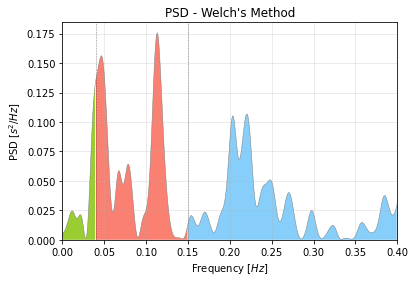

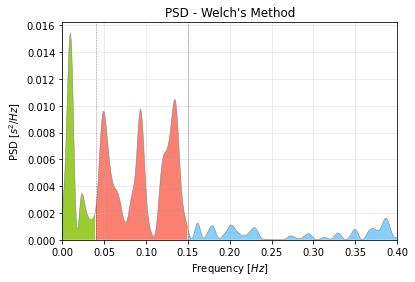

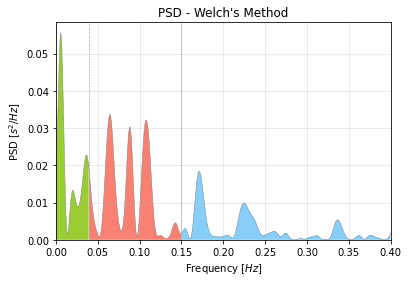

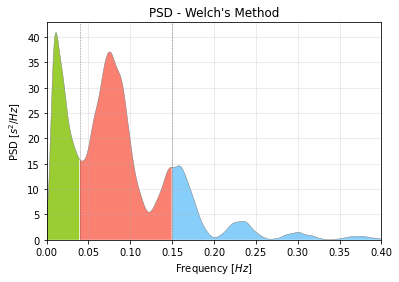

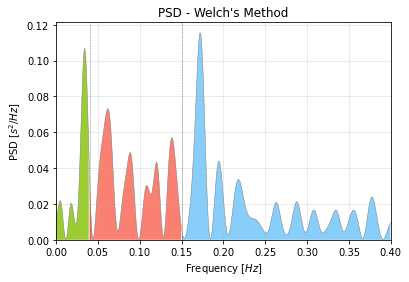

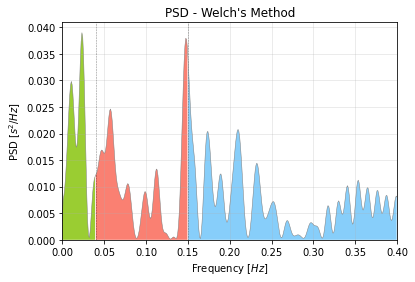

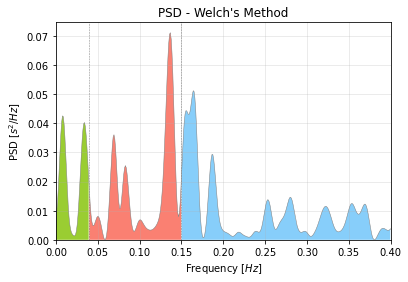

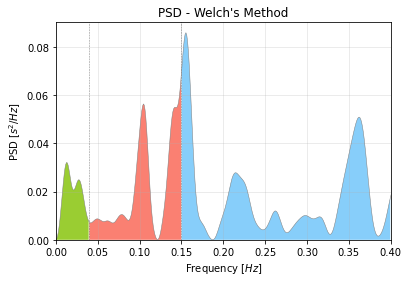

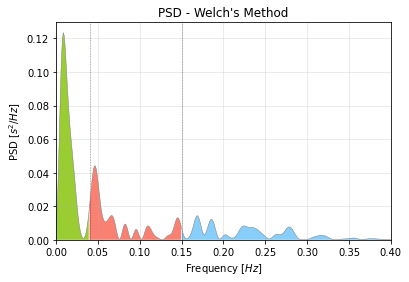

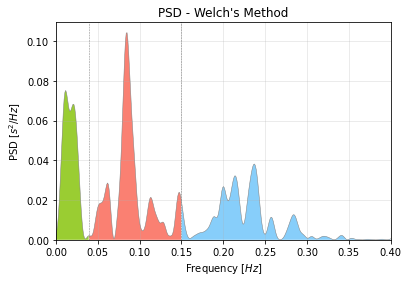

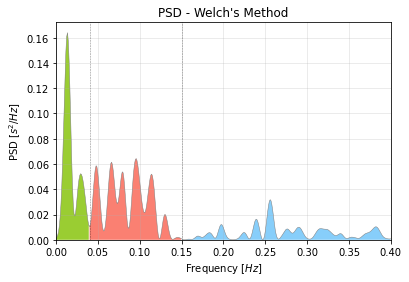

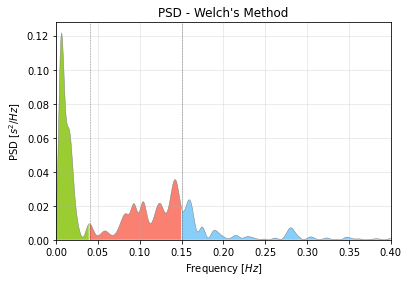

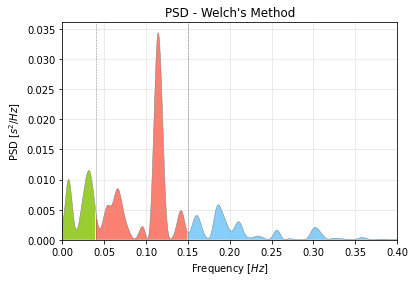

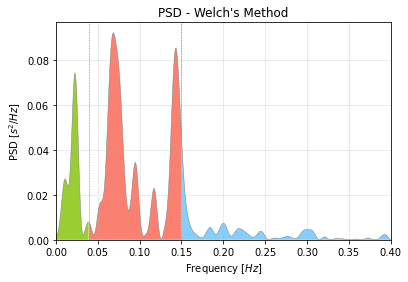

In [ ]:
app.run()